In [ ]:
!pip install jupyterlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0
ERROR: pip's dependency resolver does not currently take into account all t

In [ ]:
# Подавление предупреждений
import warnings
for warn in [UserWarning, FutureWarning]: warnings.filterwarnings("ignore", category = warn)

# Импорт необходимых библиотек
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import polars as pl
import pandas as pd
import yfinance as yf
import sklearn
import networkx as nx
import jupyterlab as jlab
import ipywidgets
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Версии необходимых библиотек
packages = [
    "Torch", "NumPy", "Polars", "Pandas", "Matplotlib", "Yfinance", "Scikit-learn", "NetworkX", "Ipywidgets", "JupyterLab"
]

package_objects = [
    torch, np, pl, pd, mpl, yf, sklearn, nx, ipywidgets, jlab
]

versions = list(map(lambda obj: obj.__version__, package_objects))

columns_order = ["№", "Библиотека", "Версия"]
df_pkgs = (
    pl.DataFrame({
        columns_order[1]: packages,
        columns_order[2]: versions
    })
    .with_columns(pl.arange(1, pl.lit(len(packages)) + 1).alias(columns_order[0]))
    .select(columns_order)
)

display(df_pkgs)

path2reqs = "."
reqs_name = "requirements.txt"

def get_packages_and_versions():
    """Генерация строк с библиотеками и их версиями в формате: библиотека==версия"""

    for package, version in zip(packages, versions):
        yield f"{package.lower()}=={version}\n"

with open(os.path.join(path2reqs, reqs_name), "w", encoding = "utf-8") as f:
    f.writelines(get_packages_and_versions())

shape: (10, 3)
┌─────┬──────────────┬─────────────┐
│ №   ┆ Библиотека   ┆ Версия      │
│ --- ┆ ---          ┆ ---         │
│ i64 ┆ str          ┆ str         │
╞═════╪══════════════╪═════════════╡
│ 1   ┆ Torch        ┆ 2.6.0+cu124 │
│ 2   ┆ NumPy        ┆ 2.0.2       │
│ 3   ┆ Polars       ┆ 1.21.0      │
│ 4   ┆ Pandas       ┆ 2.2.2       │
│ 5   ┆ Matplotlib   ┆ 3.10.0      │
│ 6   ┆ Yfinance     ┆ 0.2.61      │
│ 7   ┆ Scikit-learn ┆ 1.6.1       │
│ 8   ┆ NetworkX     ┆ 3.5         │
│ 9   ┆ Ipywidgets   ┆ 7.7.1       │
│ 10  ┆ JupyterLab   ┆ 4.4.3       │
└─────┴──────────────┴─────────────┘

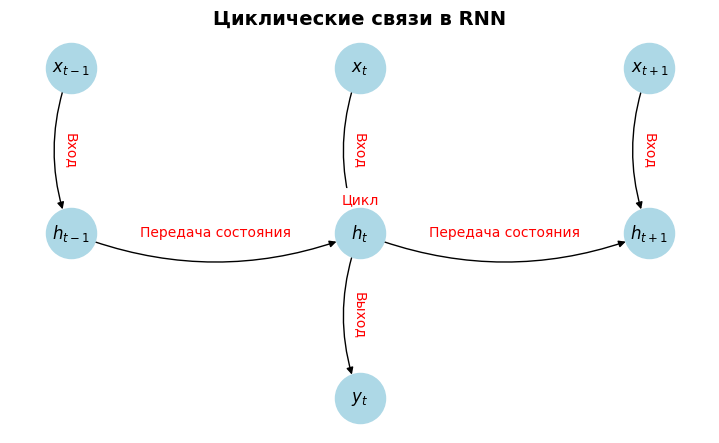

In [ ]:
def draw_rnn_diagram():
    G = nx.DiGraph()

    # Определение узлов (x - входы, h - скрытые состояния, y - выходы)
    nodes = ["$x_{t-1}$", "$x_t$", "$x_{t+1}$", "$h_{t-1}$", "$h_t$", "$h_{t+1}$", "$y_t$"]

    pos = {
        "$x_{t-1}$": (0, 1), "$x_t$": (2, 1), "$x_{t+1}$": (4, 1),
        "$h_{t-1}$": (0, 0), "$h_t$": (2, 0), "$h_{t+1}$": (4, 0),
        "$y_t$": (2, -1)
    }

    # Добавление узлов
    G.add_nodes_from(nodes)

    # Определение связей (ребра графа)
    edges = [
        ("$x_{t-1}$", "$h_{t-1}$"), ("$x_t$", "$h_t$"), ("$x_{t+1}$", "$h_{t+1}$"), # Вход -> скрытое состояние
        ("$h_{t-1}$", "$h_t$"), ("$h_t$", "$h_{t+1}$"), # Последовательная передача состояния
        ("$h_t$", "$y_t$"), # Выход
        ("$h_t$", "$h_t$") # Циклическая связь внутри h_t
    ]

    labels = {
        ("$x_{t-1}$", "$h_{t-1}$"): "Вход",
        ("$x_t$", "$h_t$"): "Вход",
        ("$x_{t+1}$", "$h_{t+1}$"): "Вход",
        ("$h_t$", "$y_t$"): "Выход",
        ("$h_t$", "$h_t$"): "Цикл",
        ("$h_{t-1}$", "$h_t$"): "Передача состояния",
        ("$h_t$", "$h_{t+1}$"): "Передача состояния",
    }

    G.add_edges_from(edges)

    # Граф
    plt.figure(figsize = (7, 4))
    nx.draw(
        G, pos, with_labels = True, node_color = "lightblue", edge_color = "black",
        node_size = 1300, font_size = 12, font_weight = "bold", arrows = True,
        connectionstyle = "arc3,rad=0.2"
    )
    edge_labels = {edge: labels[edge] for edge in labels if edge in G.edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 10, font_color = "red")

    plt.title("Циклические связи в RNN", fontsize = 14, fontweight = "bold")
    plt.show()

draw_rnn_diagram()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Epoch 0, Loss: 0.040907
Epoch 10, Loss: 0.023916
Epoch 20, Loss: 0.023679
Epoch 30, Loss: 0.023224
Epoch 40, Loss: 0.022312
Epoch 50, Loss: 0.020505
Epoch 60, Loss: 0.017095
Epoch 70, Loss: 0.011408
Epoch 80, Loss: 0.004532
Epoch 90, Loss: 0.000748


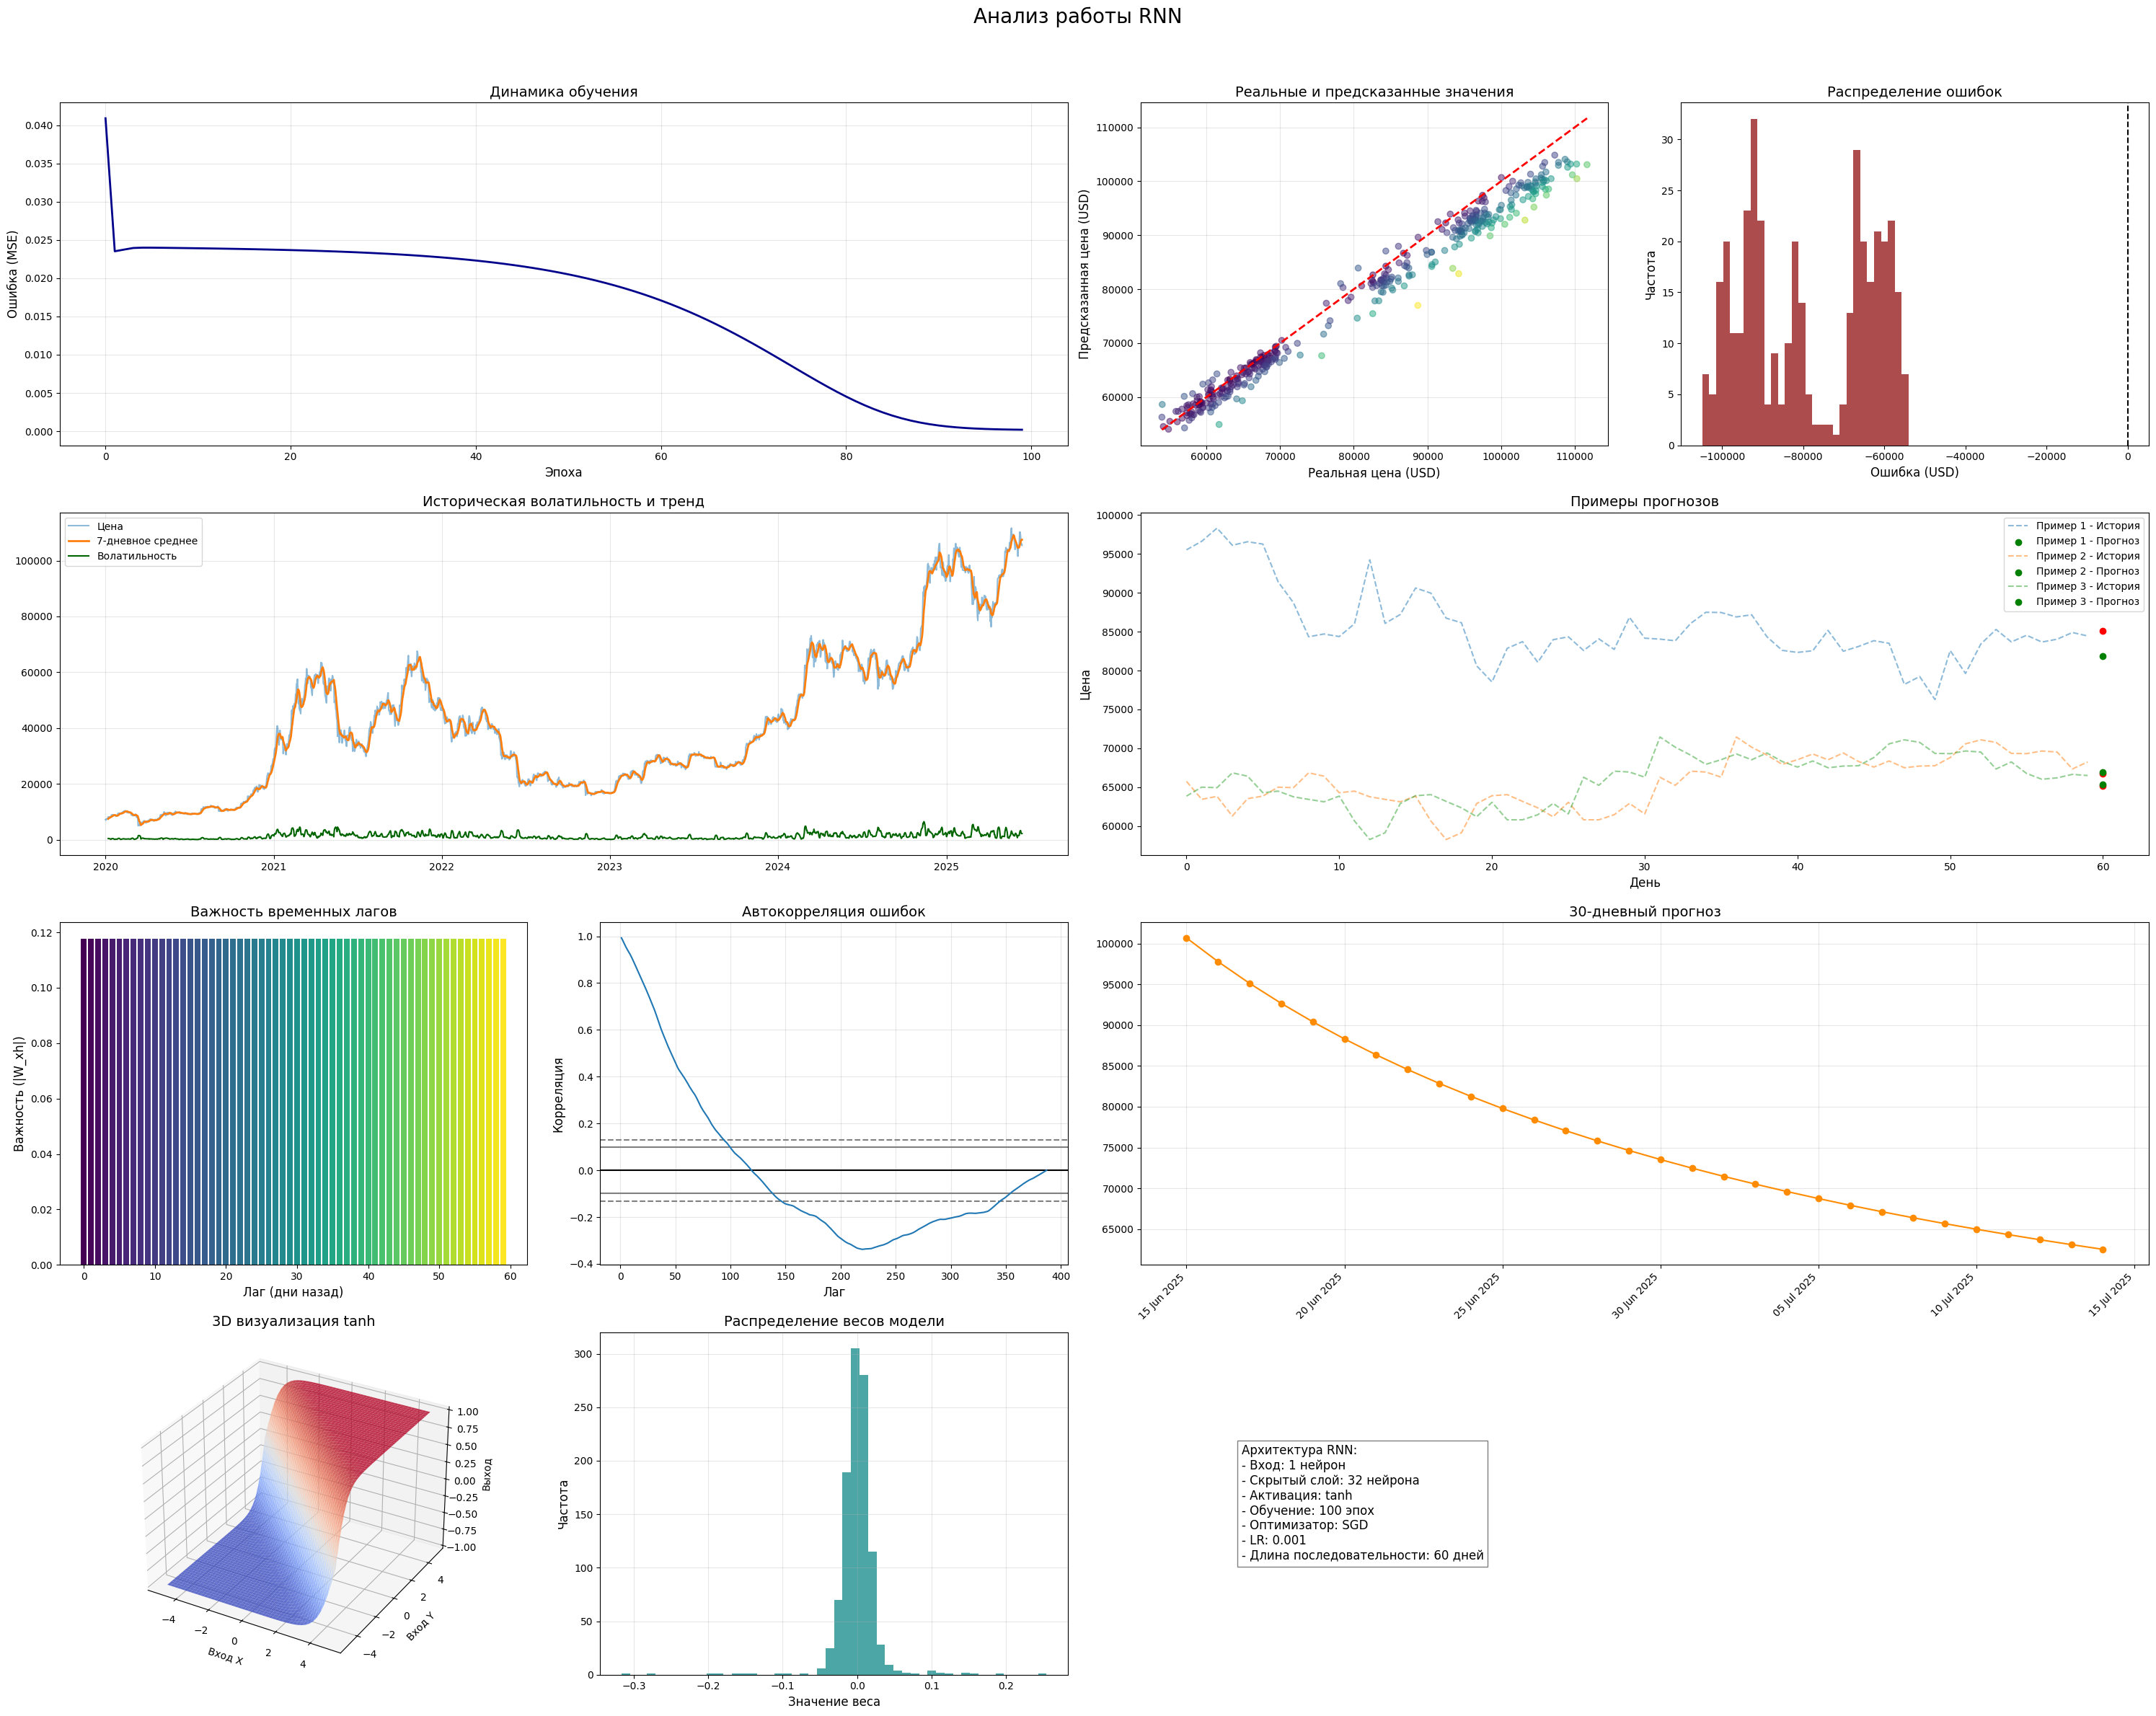

In [ ]:
# Загрузка данных
ticker = "BTC-USD"
data = yf.download(ticker, start = "2020-01-01", end = pd.Timestamp.now().strftime('%Y-%m-%d'))
data = data[['Close']]

# Нормализация данных
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data)

# Создание последовательностей
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Разделение данных
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Реализация RNN
class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.W_xh = np.random.randn(hidden_size, input_size) * 0.01
        self.W_hh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.b_h = np.zeros((hidden_size, 1))
        self.W_hy = np.random.randn(1, hidden_size) * 0.01
        self.b_y = np.zeros((1, 1))

    def forward(self, inputs):
        h_prev = np.zeros((self.W_hh.shape[0], 1))
        self.hs = [h_prev]
        self.outputs = []
        for x in inputs:
            x = x.reshape(-1, 1)
            h = np.tanh(self.W_xh @ x + self.W_hh @ h_prev + self.b_h)
            y = self.W_hy @ h + self.b_y
            self.hs.append(h)
            self.outputs.append(y)
            h_prev = h
        return self.outputs[-1]

    def backward(self, inputs, target, lr = 0.001):
        dW_xh, dW_hh, db_h = 0, 0, 0
        dW_hy, db_y = 0, 0
        dh_next = np.zeros_like(self.hs[0])

        dy = (self.outputs[-1] - target.reshape(-1, 1))
        dW_hy += dy @ self.hs[-1].T
        db_y += dy

        dh = self.W_hy.T @ dy + dh_next
        for t in reversed(range(len(inputs))):
            x = inputs[t].reshape(-1, 1)
            h_current = self.hs[t+1]
            h_prev = self.hs[t]

            dtanh = (1 - h_current ** 2) * dh
            dW_xh += dtanh @ x.T
            dW_hh += dtanh @ h_prev.T
            db_h += dtanh

            dh = self.W_hh.T @ dtanh

        clip_value = 5.0
        for grad in [dW_xh, dW_hh, dW_hy]:
            np.clip(grad, -clip_value, clip_value, out = grad)

        self.W_xh -= lr * dW_xh
        self.W_hh -= lr * dW_hh
        self.b_h -= lr * db_h
        self.W_hy -= lr * dW_hy
        self.b_y -= lr * db_y

# Параметры модели
input_size = 1
hidden_size = 32
lr = 0.001
epochs = 100

rnn = SimpleRNN(input_size, hidden_size)

# Обучение модели
loss_history = []
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(len(X_train)):
        inputs = X_train[i].reshape(-1, 1)
        target = y_train[i]

        output = rnn.forward(inputs)
        loss = (output - target.reshape(-1, 1)) ** 2
        epoch_loss += loss.item()

        rnn.backward(inputs, target, lr)

    avg_loss = epoch_loss / len(X_train)
    loss_history.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {avg_loss:.6f}")

# Функция прогнозирования
def forecast(model, last_sequence, days = 30):
    predictions = []
    current_seq = last_sequence.copy()
    for _ in range(days):
        next_pred = model.forward(current_seq)
        predictions.append(next_pred.item())
        current_seq = np.append(current_seq[1:], next_pred)
    return predictions

# Генерация предсказаний на тестовых данных
test_predictions = []
for i in range(len(X_test)):
    inputs = X_test[i].reshape(-1, 1)
    output = rnn.forward(inputs)
    test_predictions.append(output.item())

# Преобразование предсказаний обратно в исходный масштаб цен
test_predictions_inv = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Прогноз на N дней
last_sequence = scaled_data[-seq_length:].reshape(-1, 1)
scaled_forecast = forecast(rnn, last_sequence, days = 30)
forecast_prices = scaler.inverse_transform(np.array(scaled_forecast).reshape(-1, 1))

# Создание единой фигуры с subplots
plt.figure(figsize = (30, 25))
plt.suptitle("Анализ работы RNN", y = 0.95, fontsize = 20)

# 1. График обучения
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan = 2)
ax1.plot(loss_history, color = "darkblue", linewidth = 2)
ax1.set_title("Динамика обучения", fontsize = 14)
ax1.set_xlabel("Эпоха", fontsize = 12)
ax1.set_ylabel("Ошибка (MSE)", fontsize = 12)
ax1.grid(True, alpha=0.3)

# 2. Сравнение реальных и предсказанных значений
ax2 = plt.subplot2grid((4, 4), (0, 2))
ax2.scatter(y_test_inv, test_predictions_inv, alpha = 0.5, c = np.abs(y_test_inv - test_predictions_inv), cmap = "viridis")

min_val = min(y_test_inv.min(), test_predictions_inv.min())
max_val = max(y_test_inv.max(), test_predictions_inv.max())
ax2.plot([min_val, max_val], [min_val, max_val], "--r", linewidth = 2)

ax2.set_title("Реальные и предсказанные значения", fontsize = 14)
ax2.set_xlabel("Реальная цена (USD)", fontsize = 12)
ax2.set_ylabel("Предсказанная цена (USD)", fontsize = 12)
ax2.grid(alpha = 0.3)

# 3. Распределение ошибок
ax3 = plt.subplot2grid((4, 4), (0, 3))
errors = y_test - test_predictions_inv
ax3.hist(errors, bins = 30, color = "darkred", alpha = 0.7)
ax3.set_title("Распределение ошибок", fontsize = 14)
ax3.set_xlabel("Ошибка (USD)", fontsize = 12)
ax3.set_ylabel("Частота", fontsize = 12)
ax3.axvline(x = 0, color = "black", linestyle = "--")

# 4. Скользящее среднее и волатильность
ax4 = plt.subplot2grid((4, 4), (1, 0), colspan = 2)
window_size = 7
data["MA_7"] = data["Close"].rolling(window = window_size).mean()
data["Volatility"] = data["Close"].rolling(window = window_size).std()
ax4.plot(data["Close"], label = "Цена", alpha = 0.5)
ax4.plot(data["MA_7"], label = "7-дневное среднее", linewidth = 2)
ax4.plot(data["Volatility"], label = "Волатильность", color = "darkgreen")
ax4.set_title("Историческая волатильность и тренд", fontsize = 14)
ax4.legend()
ax4.grid(alpha = 0.3)

# 5. Примеры прогнозов
ax5 = plt.subplot2grid((4, 4), (1, 2), colspan = 2)
for i in range(3):
    idx = np.random.randint(len(X_test))
    seq = X_test[idx]
    pred = rnn.forward(seq.reshape(-1, 1))
    real = scaler.inverse_transform(y_test[idx].reshape(-1, 1))
    ax5.plot(scaler.inverse_transform(seq), alpha = 0.5, linestyle = "--", label = f"Пример {i+1} - История")
    ax5.scatter(len(seq), real, color = "red", zorder = 5)
    ax5.scatter(len(seq), scaler.inverse_transform(pred), color = "green", zorder = 5, label = f"Пример {i+1} - Прогноз")
ax5.set_title("Примеры прогнозов", fontsize = 14)
ax5.set_xlabel("День", fontsize = 12)
ax5.set_ylabel("Цена", fontsize = 12)
ax5.legend()

# 6. Важность временных лагов
ax6 = plt.subplot2grid((4, 4), (2, 0))
lag_importance = np.mean(np.abs(rnn.W_xh), axis = 0)
ax6.bar(range(seq_length), lag_importance, color = plt.cm.viridis(np.linspace(0,1,seq_length)))
ax6.set_title("Важность временных лагов", fontsize = 14)
ax6.set_xlabel("Лаг (дни назад)", fontsize = 12)
ax6.set_ylabel("Важность (|W_xh|)", fontsize = 12)

# 7. Автокорреляция ошибок
ax7 = plt.subplot2grid((4, 4), (2, 1))
pd.plotting.autocorrelation_plot(errors.flatten(), ax = ax7)
ax7.set_title("Автокорреляция ошибок", fontsize = 14)
ax7.set_xlabel("Лаг", fontsize = 12)
ax7.set_ylabel("Корреляция", fontsize = 12)
ax7.grid(alpha = 0.3)

# 8. Долгосрочный прогноз
ax8 = plt.subplot2grid((4, 4), (2, 2), colspan = 2)
forecast_dates = pd.date_range(start = data.index[-1], periods = 31)[1:]
ax8.plot(forecast_dates, forecast_prices, marker = "o", markersize = 6, linestyle = "-", color = "darkorange")
ax8.set_title("30-дневный прогноз", fontsize = 14)
ax8.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
ax8.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.setp(ax8.get_xticklabels(), rotation = 45, ha = "right")
ax8.grid(True, alpha = 0.3)

# 9. 3D визуализация функции активации
ax9 = plt.subplot2grid((4, 4), (3, 0), projection = "3d")
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.tanh(X + Y)
ax9.plot_surface(X, Y, Z, cmap = "coolwarm", alpha = 0.8)
ax9.set_title("3D визуализация tanh", fontsize = 14)
ax9.set_xlabel("Вход X")
ax9.set_ylabel("Вход Y")
ax9.set_zlabel("Выход")

# 10. Распределение весов
ax10 = plt.subplot2grid((4, 4), (3, 1))
gradients = np.concatenate([rnn.W_xh.flatten(), rnn.W_hh.flatten()])
ax10.hist(gradients, bins = 50, color = "teal", alpha = 0.7)
ax10.set_title("Распределение весов модели", fontsize = 14)
ax10.set_xlabel("Значение веса", fontsize = 12)
ax10.set_ylabel("Частота", fontsize = 12)
ax10.grid(True, alpha = 0.3)

# 11. Легенда модели
ax11 = plt.subplot2grid((4, 4), (3, 2), colspan = 2)
ax11.axis("off")
text = """Архитектура RNN:
- Вход: 1 нейрон
- Скрытый слой: 32 нейрона
- Активация: tanh
- Обучение: 100 эпох
- Оптимизатор: SGD
- LR: 0.001
- Длина последовательности: 60 дней"""
ax11.text(0.1, 0.5, text, fontsize = 12, va = "center", bbox = dict(facecolor = "white", alpha = 0.5))

plt.tight_layout(rect = [0, 0, 1, 0.93])
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch 0, Loss: 0.090207
Epoch 10, Loss: 0.090207
Epoch 20, Loss: 0.090207
Epoch 30, Loss: 0.090207
Epoch 40, Loss: 0.090207
Epoch 50, Loss: 0.090207
Epoch 60, Loss: 0.090207
Epoch 70, Loss: 0.090207
Epoch 80, Loss: 0.090207
Epoch 90, Loss: 0.090207


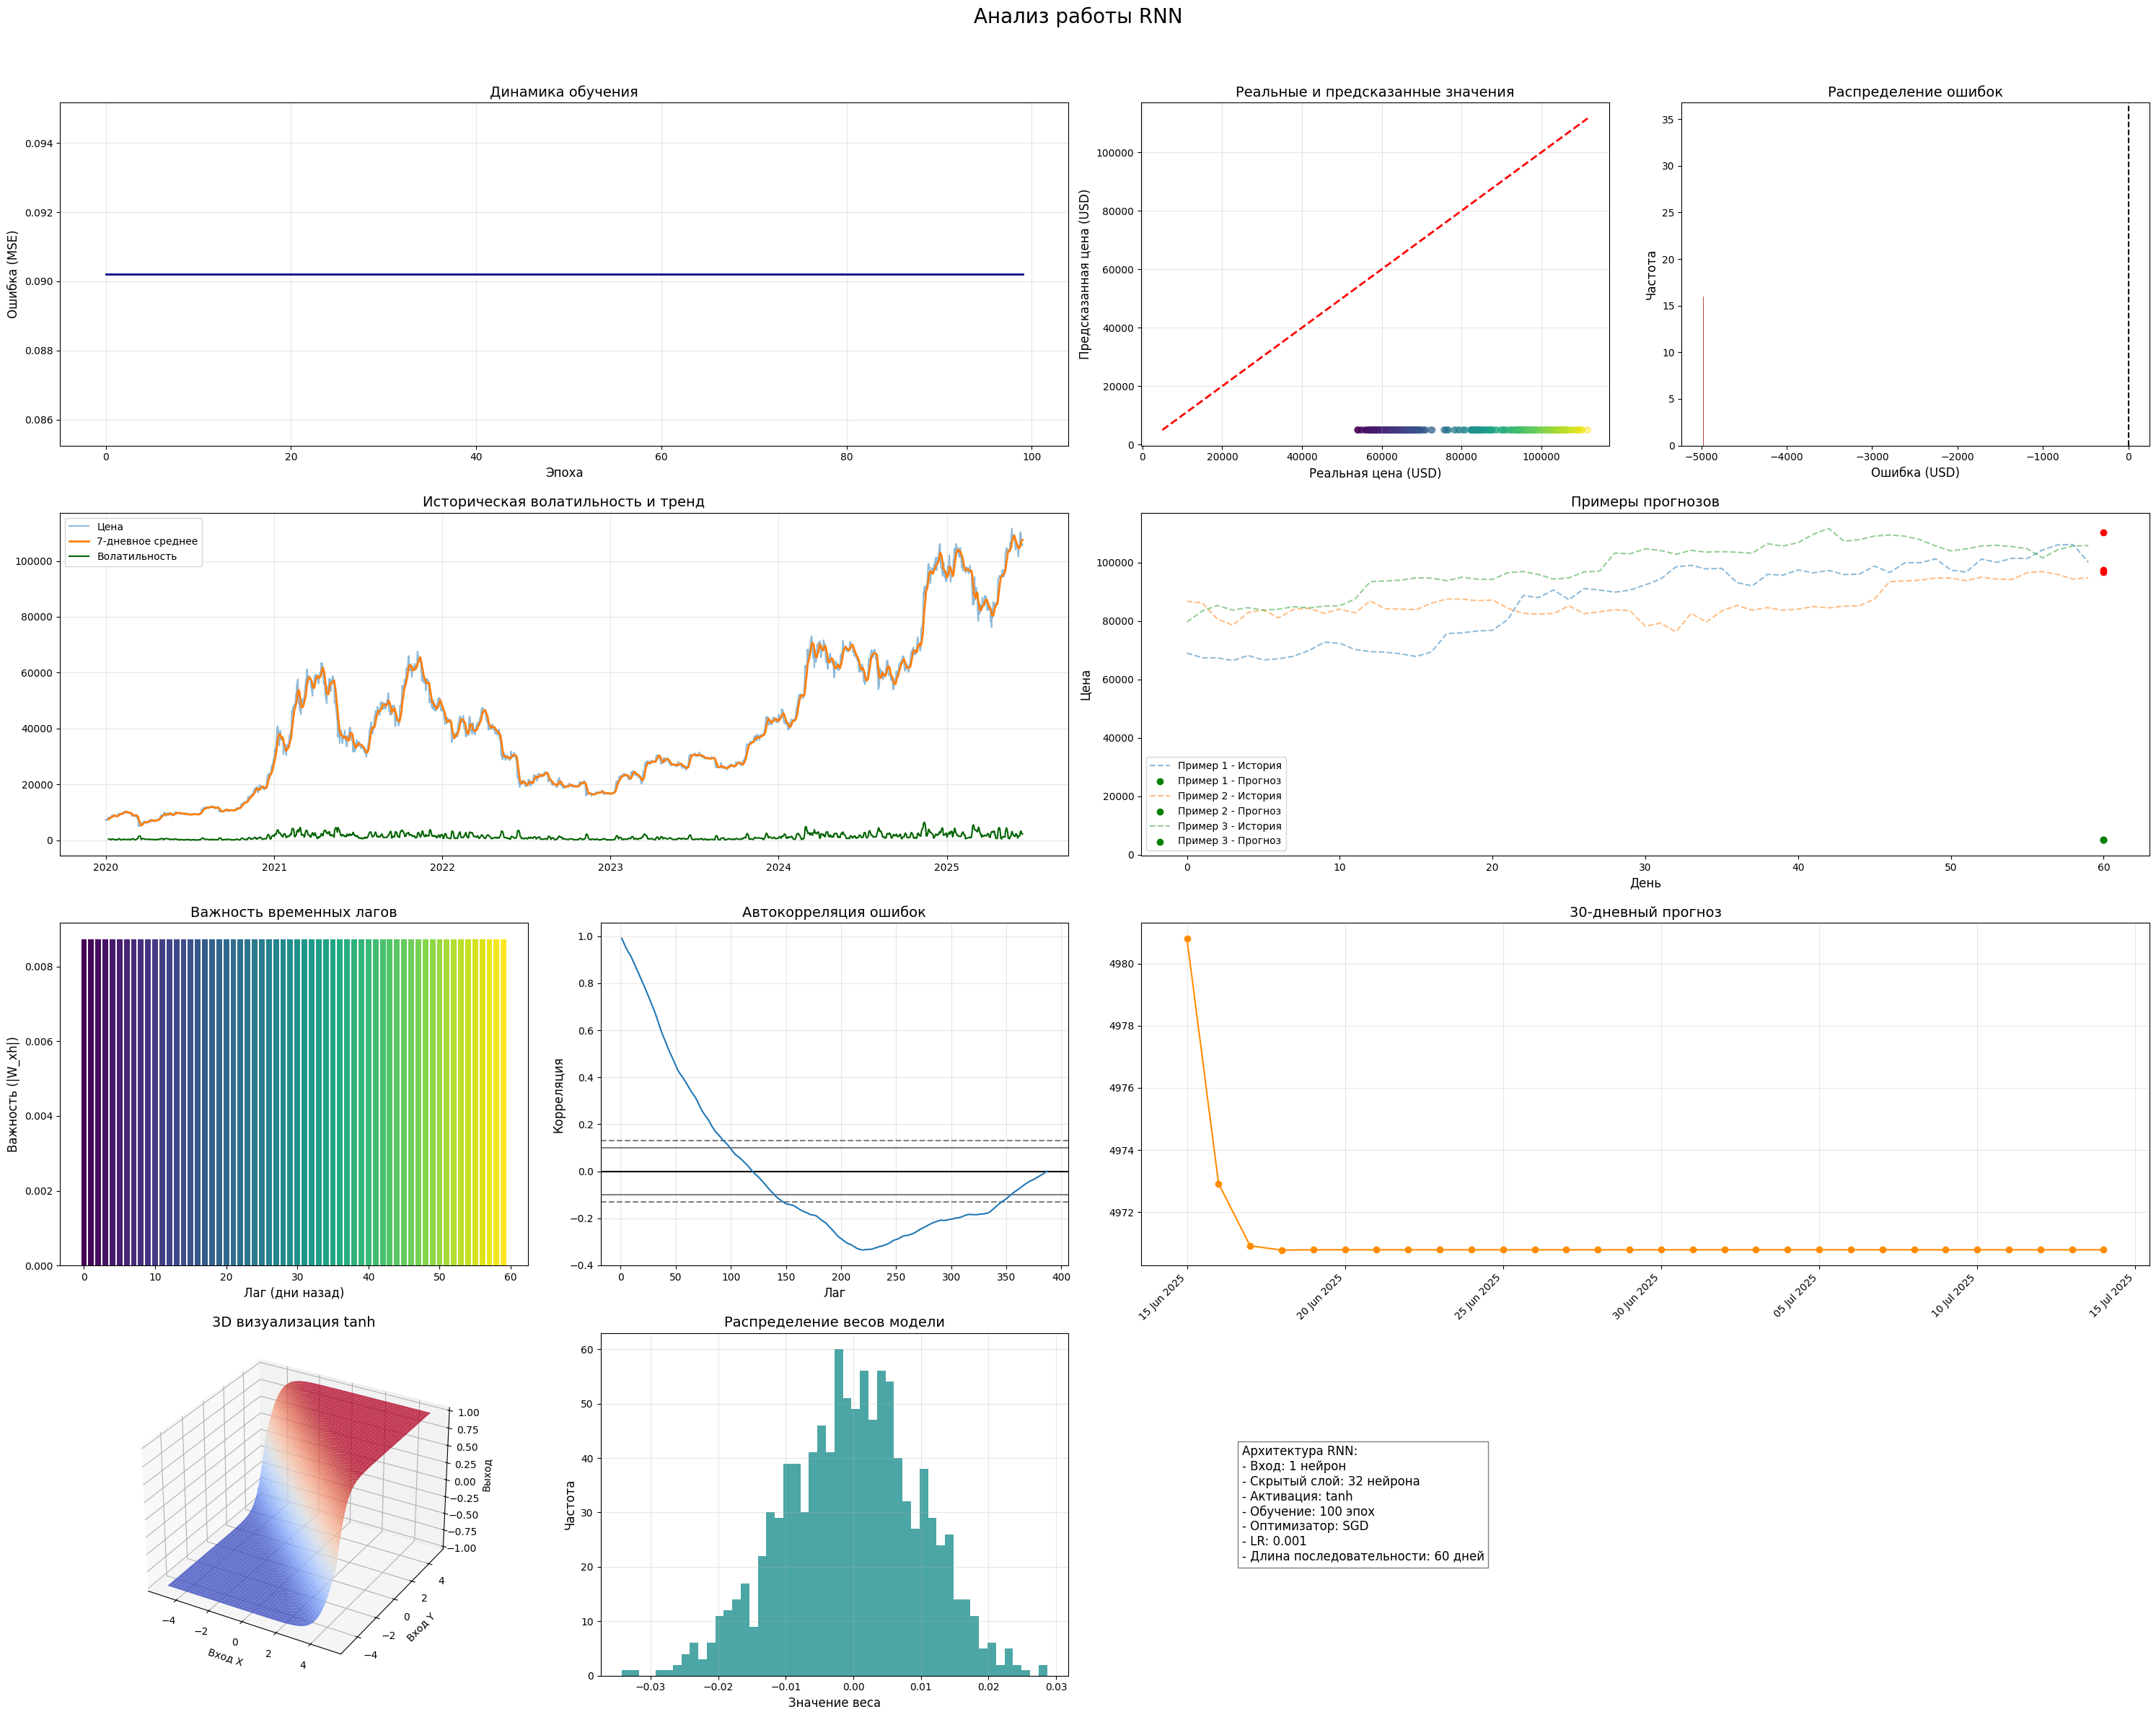

In [ ]:
# Загрузка данных
ticker = "BTC-USD"
data = yf.download(ticker, start = "2020-01-01", end = pd.Timestamp.now().strftime('%Y-%m-%d'))
data = data[['Close']]

# Нормализация данных
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data)

# Создание последовательностей
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Разделение данных
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Реализация RNN
class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.W_xh = np.random.randn(hidden_size, input_size) * 0.01
        self.W_hh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.b_h = np.zeros((hidden_size, 1))
        self.W_hy = np.random.randn(1, hidden_size) * 0.01
        self.b_y = np.zeros((1, 1))

    def forward(self, inputs):
        h_prev = np.zeros((self.W_hh.shape[0], 1))
        self.hs = [h_prev]
        self.outputs = []
        for x in inputs:
            x = x.reshape(-1, 1)
            h = np.tanh(self.W_xh @ x + self.W_hh @ h_prev + self.b_h)
            y = self.W_hy @ h + self.b_y
            self.hs.append(h)
            self.outputs.append(y)
            h_prev = h
        return self.outputs[-1]

    def backward(self, inputs, target, lr=0.001, truncate_steps = 10): # Изменение 1: Добавлен параметр
        dW_xh, dW_hh, db_h = 0, 0, 0
        dW_hy, db_y = 0, 0
        dh_next = np.zeros_like(self.hs[0])

        dy = (self.outputs[-1] - target.reshape(-1, 1))
        dW_hy += dy @ self.hs[-1].T
        db_y += dy

        dh = self.W_hy.T @ dy + dh_next

        # Изменение 2: Ограничение диапазона шагов для BPTT
        start_step = max(0, len(inputs) - truncate_steps)
        for t in reversed(range(start_step, len(inputs))): # Только последние truncate_steps шагов
            x = inputs[t].reshape(-1, 1)
            h_current = self.hs[t+1]
            h_prev = self.hs[t]

            dtanh = (1 - h_current ** 2) * dh
            dW_xh += dtanh @ x.T
            dW_hh += dtanh @ h_prev.T
            db_h += dtanh

            dh = self.W_hh.T @ dtanh

# Параметры модели
input_size = 1
hidden_size = 32
lr = 0.001
epochs = 100

rnn = SimpleRNN(input_size, hidden_size)

# Обучение модели
loss_history = []
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(len(X_train)):
        inputs = X_train[i].reshape(-1, 1)
        target = y_train[i]

        output = rnn.forward(inputs)
        loss = (output - target.reshape(-1, 1)) ** 2
        epoch_loss += loss.item()

        # Изменение 3: Передаем truncate_steps в backward
        rnn.backward(inputs, target, lr, truncate_steps = 10) # Усечение на 10 шагов

    avg_loss = epoch_loss / len(X_train)
    loss_history.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {avg_loss:.6f}")

# Функция прогнозирования
def forecast(model, last_sequence, days = 30):
    predictions = []
    current_seq = last_sequence.copy()
    for _ in range(days):
        next_pred = model.forward(current_seq)
        predictions.append(next_pred.item())
        current_seq = np.append(current_seq[1:], next_pred)
    return predictions

# Генерация предсказаний на тестовых данных
test_predictions = []
for i in range(len(X_test)):
    inputs = X_test[i].reshape(-1, 1)
    output = rnn.forward(inputs)
    test_predictions.append(output.item())

# Преобразование предсказаний обратно в исходный масштаб цен
test_predictions_inv = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Прогноз на N дней
last_sequence = scaled_data[-seq_length:].reshape(-1, 1)
scaled_forecast = forecast(rnn, last_sequence, days = 30)
forecast_prices = scaler.inverse_transform(np.array(scaled_forecast).reshape(-1, 1))

# Создание единой фигуры с subplots
plt.figure(figsize = (30, 25))
plt.suptitle("Анализ работы RNN", y = 0.95, fontsize = 20)

# 1. График обучения
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan = 2)
ax1.plot(loss_history, color = "darkblue", linewidth = 2)
ax1.set_title("Динамика обучения", fontsize = 14)
ax1.set_xlabel("Эпоха", fontsize = 12)
ax1.set_ylabel("Ошибка (MSE)", fontsize = 12)
ax1.grid(True, alpha=0.3)

# 2. Сравнение реальных и предсказанных значений
ax2 = plt.subplot2grid((4, 4), (0, 2))
ax2.scatter(y_test_inv, test_predictions_inv, alpha = 0.5, c = np.abs(y_test_inv - test_predictions_inv), cmap = "viridis")

min_val = min(y_test_inv.min(), test_predictions_inv.min())
max_val = max(y_test_inv.max(), test_predictions_inv.max())
ax2.plot([min_val, max_val], [min_val, max_val], "--r", linewidth = 2)

ax2.set_title("Реальные и предсказанные значения", fontsize = 14)
ax2.set_xlabel("Реальная цена (USD)", fontsize = 12)
ax2.set_ylabel("Предсказанная цена (USD)", fontsize = 12)
ax2.grid(alpha = 0.3)

# 3. Распределение ошибок
ax3 = plt.subplot2grid((4, 4), (0, 3))
errors = y_test - test_predictions_inv
ax3.hist(errors, bins = 30, color = "darkred", alpha = 0.7)
ax3.set_title("Распределение ошибок", fontsize = 14)
ax3.set_xlabel("Ошибка (USD)", fontsize = 12)
ax3.set_ylabel("Частота", fontsize = 12)
ax3.axvline(x = 0, color = "black", linestyle = "--")

# 4. Скользящее среднее и волатильность
ax4 = plt.subplot2grid((4, 4), (1, 0), colspan = 2)
window_size = 7
data["MA_7"] = data["Close"].rolling(window = window_size).mean()
data["Volatility"] = data["Close"].rolling(window = window_size).std()
ax4.plot(data["Close"], label = "Цена", alpha = 0.5)
ax4.plot(data["MA_7"], label = "7-дневное среднее", linewidth = 2)
ax4.plot(data["Volatility"], label = "Волатильность", color = "darkgreen")
ax4.set_title("Историческая волатильность и тренд", fontsize = 14)
ax4.legend()
ax4.grid(alpha = 0.3)

# 5. Примеры прогнозов
ax5 = plt.subplot2grid((4, 4), (1, 2), colspan = 2)
for i in range(3):
    idx = np.random.randint(len(X_test))
    seq = X_test[idx]
    pred = rnn.forward(seq.reshape(-1, 1))
    real = scaler.inverse_transform(y_test[idx].reshape(-1, 1))
    ax5.plot(scaler.inverse_transform(seq), alpha = 0.5, linestyle = "--", label = f"Пример {i+1} - История")
    ax5.scatter(len(seq), real, color = "red", zorder = 5)
    ax5.scatter(len(seq), scaler.inverse_transform(pred), color = "green", zorder = 5, label = f"Пример {i+1} - Прогноз")
ax5.set_title("Примеры прогнозов", fontsize = 14)
ax5.set_xlabel("День", fontsize = 12)
ax5.set_ylabel("Цена", fontsize = 12)
ax5.legend()

# 6. Важность временных лагов
ax6 = plt.subplot2grid((4, 4), (2, 0))
lag_importance = np.mean(np.abs(rnn.W_xh), axis = 0)
ax6.bar(range(seq_length), lag_importance, color = plt.cm.viridis(np.linspace(0,1,seq_length)))
ax6.set_title("Важность временных лагов", fontsize = 14)
ax6.set_xlabel("Лаг (дни назад)", fontsize = 12)
ax6.set_ylabel("Важность (|W_xh|)", fontsize = 12)

# 7. Автокорреляция ошибок
ax7 = plt.subplot2grid((4, 4), (2, 1))
pd.plotting.autocorrelation_plot(errors.flatten(), ax = ax7)
ax7.set_title("Автокорреляция ошибок", fontsize = 14)
ax7.set_xlabel("Лаг", fontsize = 12)
ax7.set_ylabel("Корреляция", fontsize = 12)
ax7.grid(alpha = 0.3)

# 8. Долгосрочный прогноз
ax8 = plt.subplot2grid((4, 4), (2, 2), colspan = 2)
forecast_dates = pd.date_range(start = data.index[-1], periods = 31)[1:]
ax8.plot(forecast_dates, forecast_prices, marker = "o", markersize = 6, linestyle = "-", color = "darkorange")
ax8.set_title("30-дневный прогноз", fontsize = 14)
ax8.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
ax8.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.setp(ax8.get_xticklabels(), rotation = 45, ha = "right")
ax8.grid(True, alpha = 0.3)

# 9. 3D визуализация функции активации
ax9 = plt.subplot2grid((4, 4), (3, 0), projection = "3d")
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.tanh(X + Y)
ax9.plot_surface(X, Y, Z, cmap = "coolwarm", alpha = 0.8)
ax9.set_title("3D визуализация tanh", fontsize = 14)
ax9.set_xlabel("Вход X")
ax9.set_ylabel("Вход Y")
ax9.set_zlabel("Выход")

# 10. Распределение весов
ax10 = plt.subplot2grid((4, 4), (3, 1))
gradients = np.concatenate([rnn.W_xh.flatten(), rnn.W_hh.flatten()])
ax10.hist(gradients, bins = 50, color = "teal", alpha = 0.7)
ax10.set_title("Распределение весов модели", fontsize = 14)
ax10.set_xlabel("Значение веса", fontsize = 12)
ax10.set_ylabel("Частота", fontsize = 12)
ax10.grid(True, alpha = 0.3)

# 11. Легенда модели
ax11 = plt.subplot2grid((4, 4), (3, 2), colspan = 2)
ax11.axis("off")
text = """Архитектура RNN:
- Вход: 1 нейрон
- Скрытый слой: 32 нейрона
- Активация: tanh
- Обучение: 100 эпох
- Оптимизатор: SGD
- LR: 0.001
- Длина последовательности: 60 дней"""
ax11.text(0.1, 0.5, text, fontsize = 12, va = "center", bbox = dict(facecolor = "white", alpha = 0.5))

plt.tight_layout(rect = [0, 0, 1, 0.93])
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch 0, Loss: 0.040886
Epoch 10, Loss: 0.023918
Epoch 20, Loss: 0.023705
Epoch 30, Loss: 0.023278
Epoch 40, Loss: 0.022405
Epoch 50, Loss: 0.020640
Epoch 60, Loss: 0.017247
Epoch 70, Loss: 0.011476
Epoch 80, Loss: 0.004421
Epoch 90, Loss: 0.000673


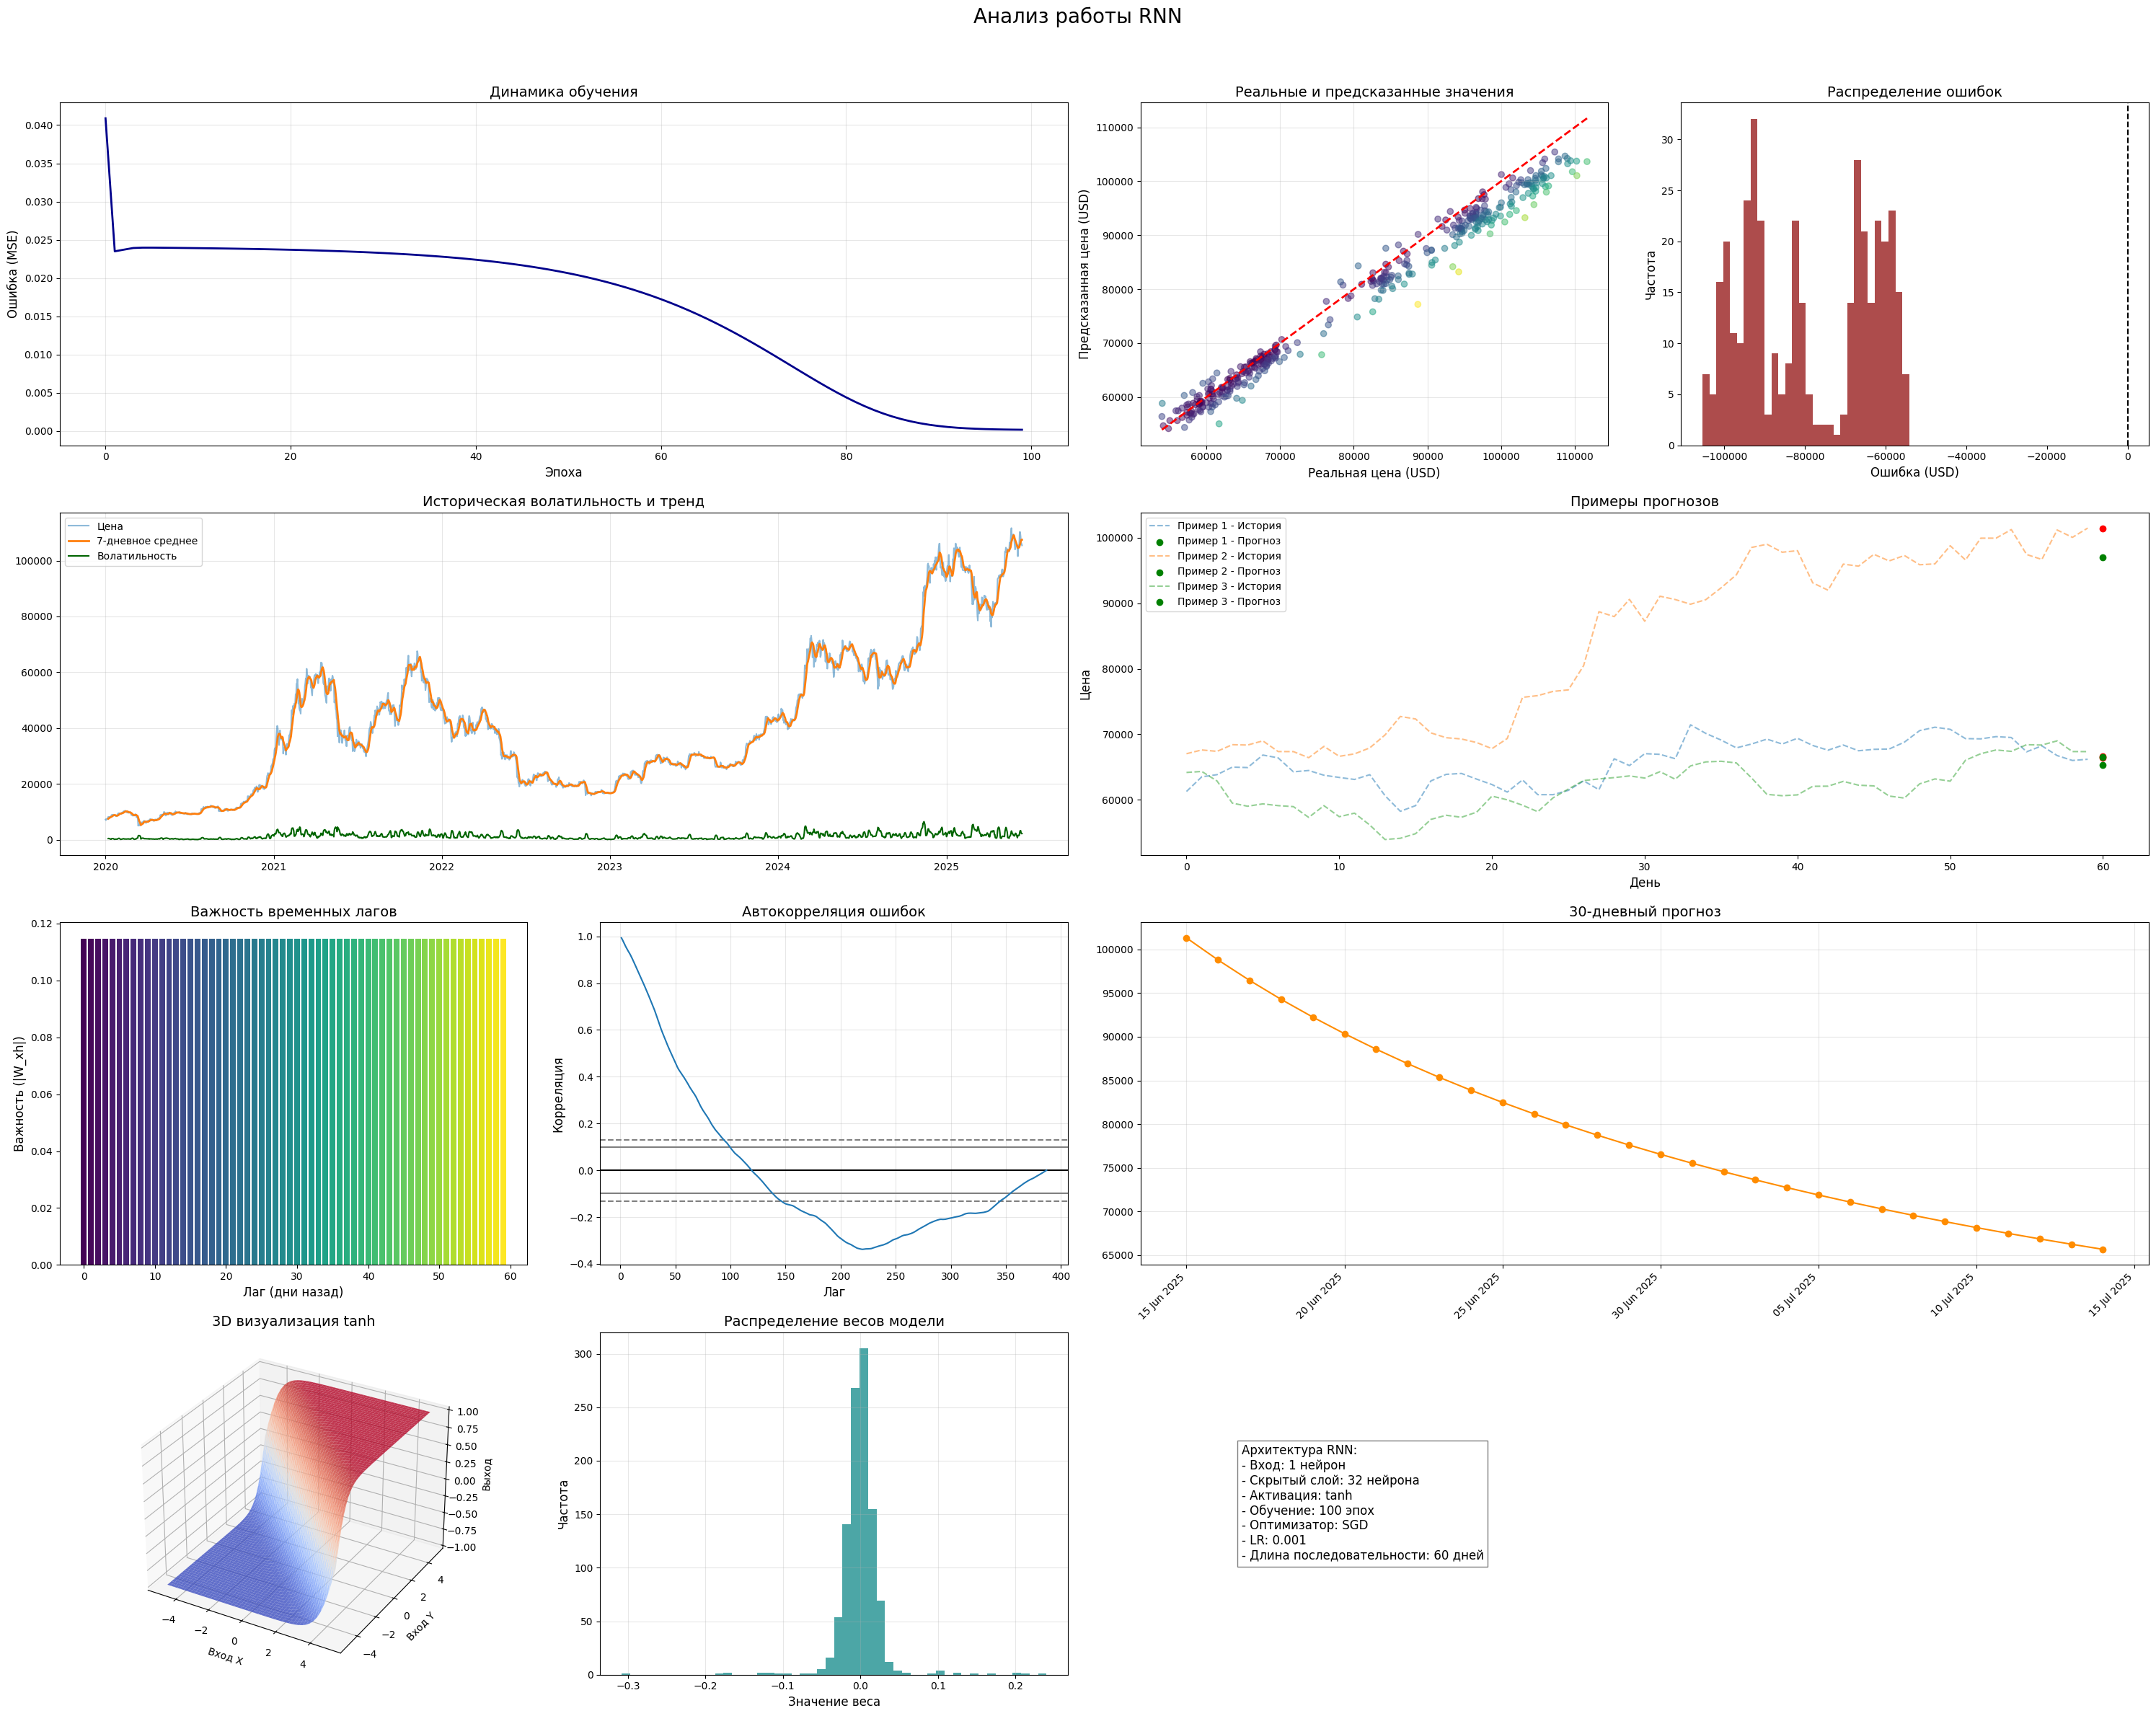

In [ ]:
# Загрузка данных
ticker = "BTC-USD"
data = yf.download(ticker, start = "2020-01-01", end = pd.Timestamp.now().strftime('%Y-%m-%d'))
data = data[['Close']]

# Нормализация данных
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data)

# Создание последовательностей
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Разделение данных
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Реализация RNN
class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.W_xh = np.random.randn(hidden_size, input_size) * 0.01
        self.W_hh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.b_h = np.zeros((hidden_size, 1))
        self.W_hy = np.random.randn(1, hidden_size) * 0.01
        self.b_y = np.zeros((1, 1))

    def forward(self, inputs):
        h_prev = np.zeros((self.W_hh.shape[0], 1))
        self.hs = [h_prev]
        self.outputs = []
        for x in inputs:
            x = x.reshape(-1, 1)
            h = np.tanh(self.W_xh @ x + self.W_hh @ h_prev + self.b_h)
            y = self.W_hy @ h + self.b_y
            self.hs.append(h)
            self.outputs.append(y)
            h_prev = h
        return self.outputs[-1]

    def backward(self, inputs, target, lr=0.001, clip_norm=5.0): # Изменение 1: clip_norm вместо truncate_steps
        dW_xh, dW_hh, db_h = 0, 0, 0
        dW_hy, db_y = 0, 0
        dh_next = np.zeros_like(self.hs[0])

        dy = (self.outputs[-1] - target.reshape(-1, 1))
        dW_hy += dy @ self.hs[-1].T
        db_y += dy

        dh = self.W_hy.T @ dy + dh_next

        # Изменение 2: Возвращение полного BPTT без усечения шагов
        for t in reversed(range(len(inputs))): # Обработка всех шагов
            x = inputs[t].reshape(-1, 1)
            h_current = self.hs[t+1]
            h_prev = self.hs[t]

            dtanh = (1 - h_current ** 2) * dh
            dW_xh += dtanh @ x.T
            dW_hh += dtanh @ h_prev.T
            db_h += dtanh

            dh = self.W_hh.T @ dtanh

        # Изменение 3: Gradient Clipping по L2-норме
        grads = [dW_xh, dW_hh, db_h, dW_hy, db_y]
        global_norm = np.sqrt(sum(np.sum(g**2) for g in grads)) # Подсчет общей нормы

        if global_norm > clip_norm:
            scale = clip_norm / global_norm
            for g in grads:
                g *= scale # Масштабирование всех градиентов

        # Обновление весов (без изменений)
        self.W_xh -= lr * dW_xh
        self.W_hh -= lr * dW_hh
        self.b_h -= lr * db_h
        self.W_hy -= lr * dW_hy
        self.b_y -= lr * db_y

# Параметры модели
input_size = 1
hidden_size = 32
lr = 0.001
epochs = 100

rnn = SimpleRNN(input_size, hidden_size)

# Обучение модели
loss_history = []
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(len(X_train)):
        inputs = X_train[i].reshape(-1, 1)
        target = y_train[i]

        output = rnn.forward(inputs)
        loss = (output - target.reshape(-1, 1)) ** 2
        epoch_loss += loss.item()

        # Изменение 4: Вызов backward без параметра truncate_steps
        rnn.backward(inputs, target, lr, clip_norm = 5.0) # clip_norm вместо truncate_steps

    avg_loss = epoch_loss / len(X_train)
    loss_history.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {avg_loss:.6f}")

# Функция прогнозирования
def forecast(model, last_sequence, days = 30):
    predictions = []
    current_seq = last_sequence.copy()
    for _ in range(days):
        next_pred = model.forward(current_seq)
        predictions.append(next_pred.item())
        current_seq = np.append(current_seq[1:], next_pred)
    return predictions

# Генерация предсказаний на тестовых данных
test_predictions = []
for i in range(len(X_test)):
    inputs = X_test[i].reshape(-1, 1)
    output = rnn.forward(inputs)
    test_predictions.append(output.item())

# Преобразование предсказаний обратно в исходный масштаб цен
test_predictions_inv = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Прогноз на N дней
last_sequence = scaled_data[-seq_length:].reshape(-1, 1)
scaled_forecast = forecast(rnn, last_sequence, days = 30)
forecast_prices = scaler.inverse_transform(np.array(scaled_forecast).reshape(-1, 1))

# Создание единой фигуры с subplots
plt.figure(figsize = (30, 25))
plt.suptitle("Анализ работы RNN", y = 0.95, fontsize = 20)

# 1. График обучения
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan = 2)
ax1.plot(loss_history, color = "darkblue", linewidth = 2)
ax1.set_title("Динамика обучения", fontsize = 14)
ax1.set_xlabel("Эпоха", fontsize = 12)
ax1.set_ylabel("Ошибка (MSE)", fontsize = 12)
ax1.grid(True, alpha=0.3)

# 2. Сравнение реальных и предсказанных значений
ax2 = plt.subplot2grid((4, 4), (0, 2))
ax2.scatter(y_test_inv, test_predictions_inv, alpha = 0.5, c = np.abs(y_test_inv - test_predictions_inv), cmap = "viridis")

min_val = min(y_test_inv.min(), test_predictions_inv.min())
max_val = max(y_test_inv.max(), test_predictions_inv.max())
ax2.plot([min_val, max_val], [min_val, max_val], "--r", linewidth = 2)

ax2.set_title("Реальные и предсказанные значения", fontsize = 14)
ax2.set_xlabel("Реальная цена (USD)", fontsize = 12)
ax2.set_ylabel("Предсказанная цена (USD)", fontsize = 12)
ax2.grid(alpha = 0.3)

# 3. Распределение ошибок
ax3 = plt.subplot2grid((4, 4), (0, 3))
errors = y_test - test_predictions_inv
ax3.hist(errors, bins = 30, color = "darkred", alpha = 0.7)
ax3.set_title("Распределение ошибок", fontsize = 14)
ax3.set_xlabel("Ошибка (USD)", fontsize = 12)
ax3.set_ylabel("Частота", fontsize = 12)
ax3.axvline(x = 0, color = "black", linestyle = "--")

# 4. Скользящее среднее и волатильность
ax4 = plt.subplot2grid((4, 4), (1, 0), colspan = 2)
window_size = 7
data["MA_7"] = data["Close"].rolling(window = window_size).mean()
data["Volatility"] = data["Close"].rolling(window = window_size).std()
ax4.plot(data["Close"], label = "Цена", alpha = 0.5)
ax4.plot(data["MA_7"], label = "7-дневное среднее", linewidth = 2)
ax4.plot(data["Volatility"], label = "Волатильность", color = "darkgreen")
ax4.set_title("Историческая волатильность и тренд", fontsize = 14)
ax4.legend()
ax4.grid(alpha = 0.3)

# 5. Примеры прогнозов
ax5 = plt.subplot2grid((4, 4), (1, 2), colspan = 2)
for i in range(3):
    idx = np.random.randint(len(X_test))
    seq = X_test[idx]
    pred = rnn.forward(seq.reshape(-1, 1))
    real = scaler.inverse_transform(y_test[idx].reshape(-1, 1))
    ax5.plot(scaler.inverse_transform(seq), alpha = 0.5, linestyle = "--", label = f"Пример {i+1} - История")
    ax5.scatter(len(seq), real, color = "red", zorder = 5)
    ax5.scatter(len(seq), scaler.inverse_transform(pred), color = "green", zorder = 5, label = f"Пример {i+1} - Прогноз")
ax5.set_title("Примеры прогнозов", fontsize = 14)
ax5.set_xlabel("День", fontsize = 12)
ax5.set_ylabel("Цена", fontsize = 12)
ax5.legend()

# 6. Важность временных лагов
ax6 = plt.subplot2grid((4, 4), (2, 0))
lag_importance = np.mean(np.abs(rnn.W_xh), axis = 0)
ax6.bar(range(seq_length), lag_importance, color = plt.cm.viridis(np.linspace(0,1,seq_length)))
ax6.set_title("Важность временных лагов", fontsize = 14)
ax6.set_xlabel("Лаг (дни назад)", fontsize = 12)
ax6.set_ylabel("Важность (|W_xh|)", fontsize = 12)

# 7. Автокорреляция ошибок
ax7 = plt.subplot2grid((4, 4), (2, 1))
pd.plotting.autocorrelation_plot(errors.flatten(), ax = ax7)
ax7.set_title("Автокорреляция ошибок", fontsize = 14)
ax7.set_xlabel("Лаг", fontsize = 12)
ax7.set_ylabel("Корреляция", fontsize = 12)
ax7.grid(alpha = 0.3)

# 8. Долгосрочный прогноз
ax8 = plt.subplot2grid((4, 4), (2, 2), colspan = 2)
forecast_dates = pd.date_range(start = data.index[-1], periods = 31)[1:]
ax8.plot(forecast_dates, forecast_prices, marker = "o", markersize = 6, linestyle = "-", color = "darkorange")
ax8.set_title("30-дневный прогноз", fontsize = 14)
ax8.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
ax8.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.setp(ax8.get_xticklabels(), rotation = 45, ha = "right")
ax8.grid(True, alpha = 0.3)

# 9. 3D визуализация функции активации
ax9 = plt.subplot2grid((4, 4), (3, 0), projection = "3d")
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.tanh(X + Y)
ax9.plot_surface(X, Y, Z, cmap = "coolwarm", alpha = 0.8)
ax9.set_title("3D визуализация tanh", fontsize = 14)
ax9.set_xlabel("Вход X")
ax9.set_ylabel("Вход Y")
ax9.set_zlabel("Выход")

# 10. Распределение весов
ax10 = plt.subplot2grid((4, 4), (3, 1))
gradients = np.concatenate([rnn.W_xh.flatten(), rnn.W_hh.flatten()])
ax10.hist(gradients, bins = 50, color = "teal", alpha = 0.7)
ax10.set_title("Распределение весов модели", fontsize = 14)
ax10.set_xlabel("Значение веса", fontsize = 12)
ax10.set_ylabel("Частота", fontsize = 12)
ax10.grid(True, alpha = 0.3)

# 11. Легенда модели
ax11 = plt.subplot2grid((4, 4), (3, 2), colspan = 2)
ax11.axis("off")
text = """Архитектура RNN:
- Вход: 1 нейрон
- Скрытый слой: 32 нейрона
- Активация: tanh
- Обучение: 100 эпох
- Оптимизатор: SGD
- LR: 0.001
- Длина последовательности: 60 дней"""
ax11.text(0.1, 0.5, text, fontsize = 12, va = "center", bbox = dict(facecolor = "white", alpha = 0.5))

plt.tight_layout(rect = [0, 0, 1, 0.93])
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch 0, Loss: 0.000897
Epoch 10, Loss: 0.004442
Epoch 20, Loss: 0.002755
Epoch 30, Loss: 0.000477
Epoch 40, Loss: 0.000314
Epoch 50, Loss: 0.000260
Epoch 60, Loss: 0.000255
Epoch 70, Loss: 0.000252
Epoch 80, Loss: 0.000283
Epoch 90, Loss: 0.000208


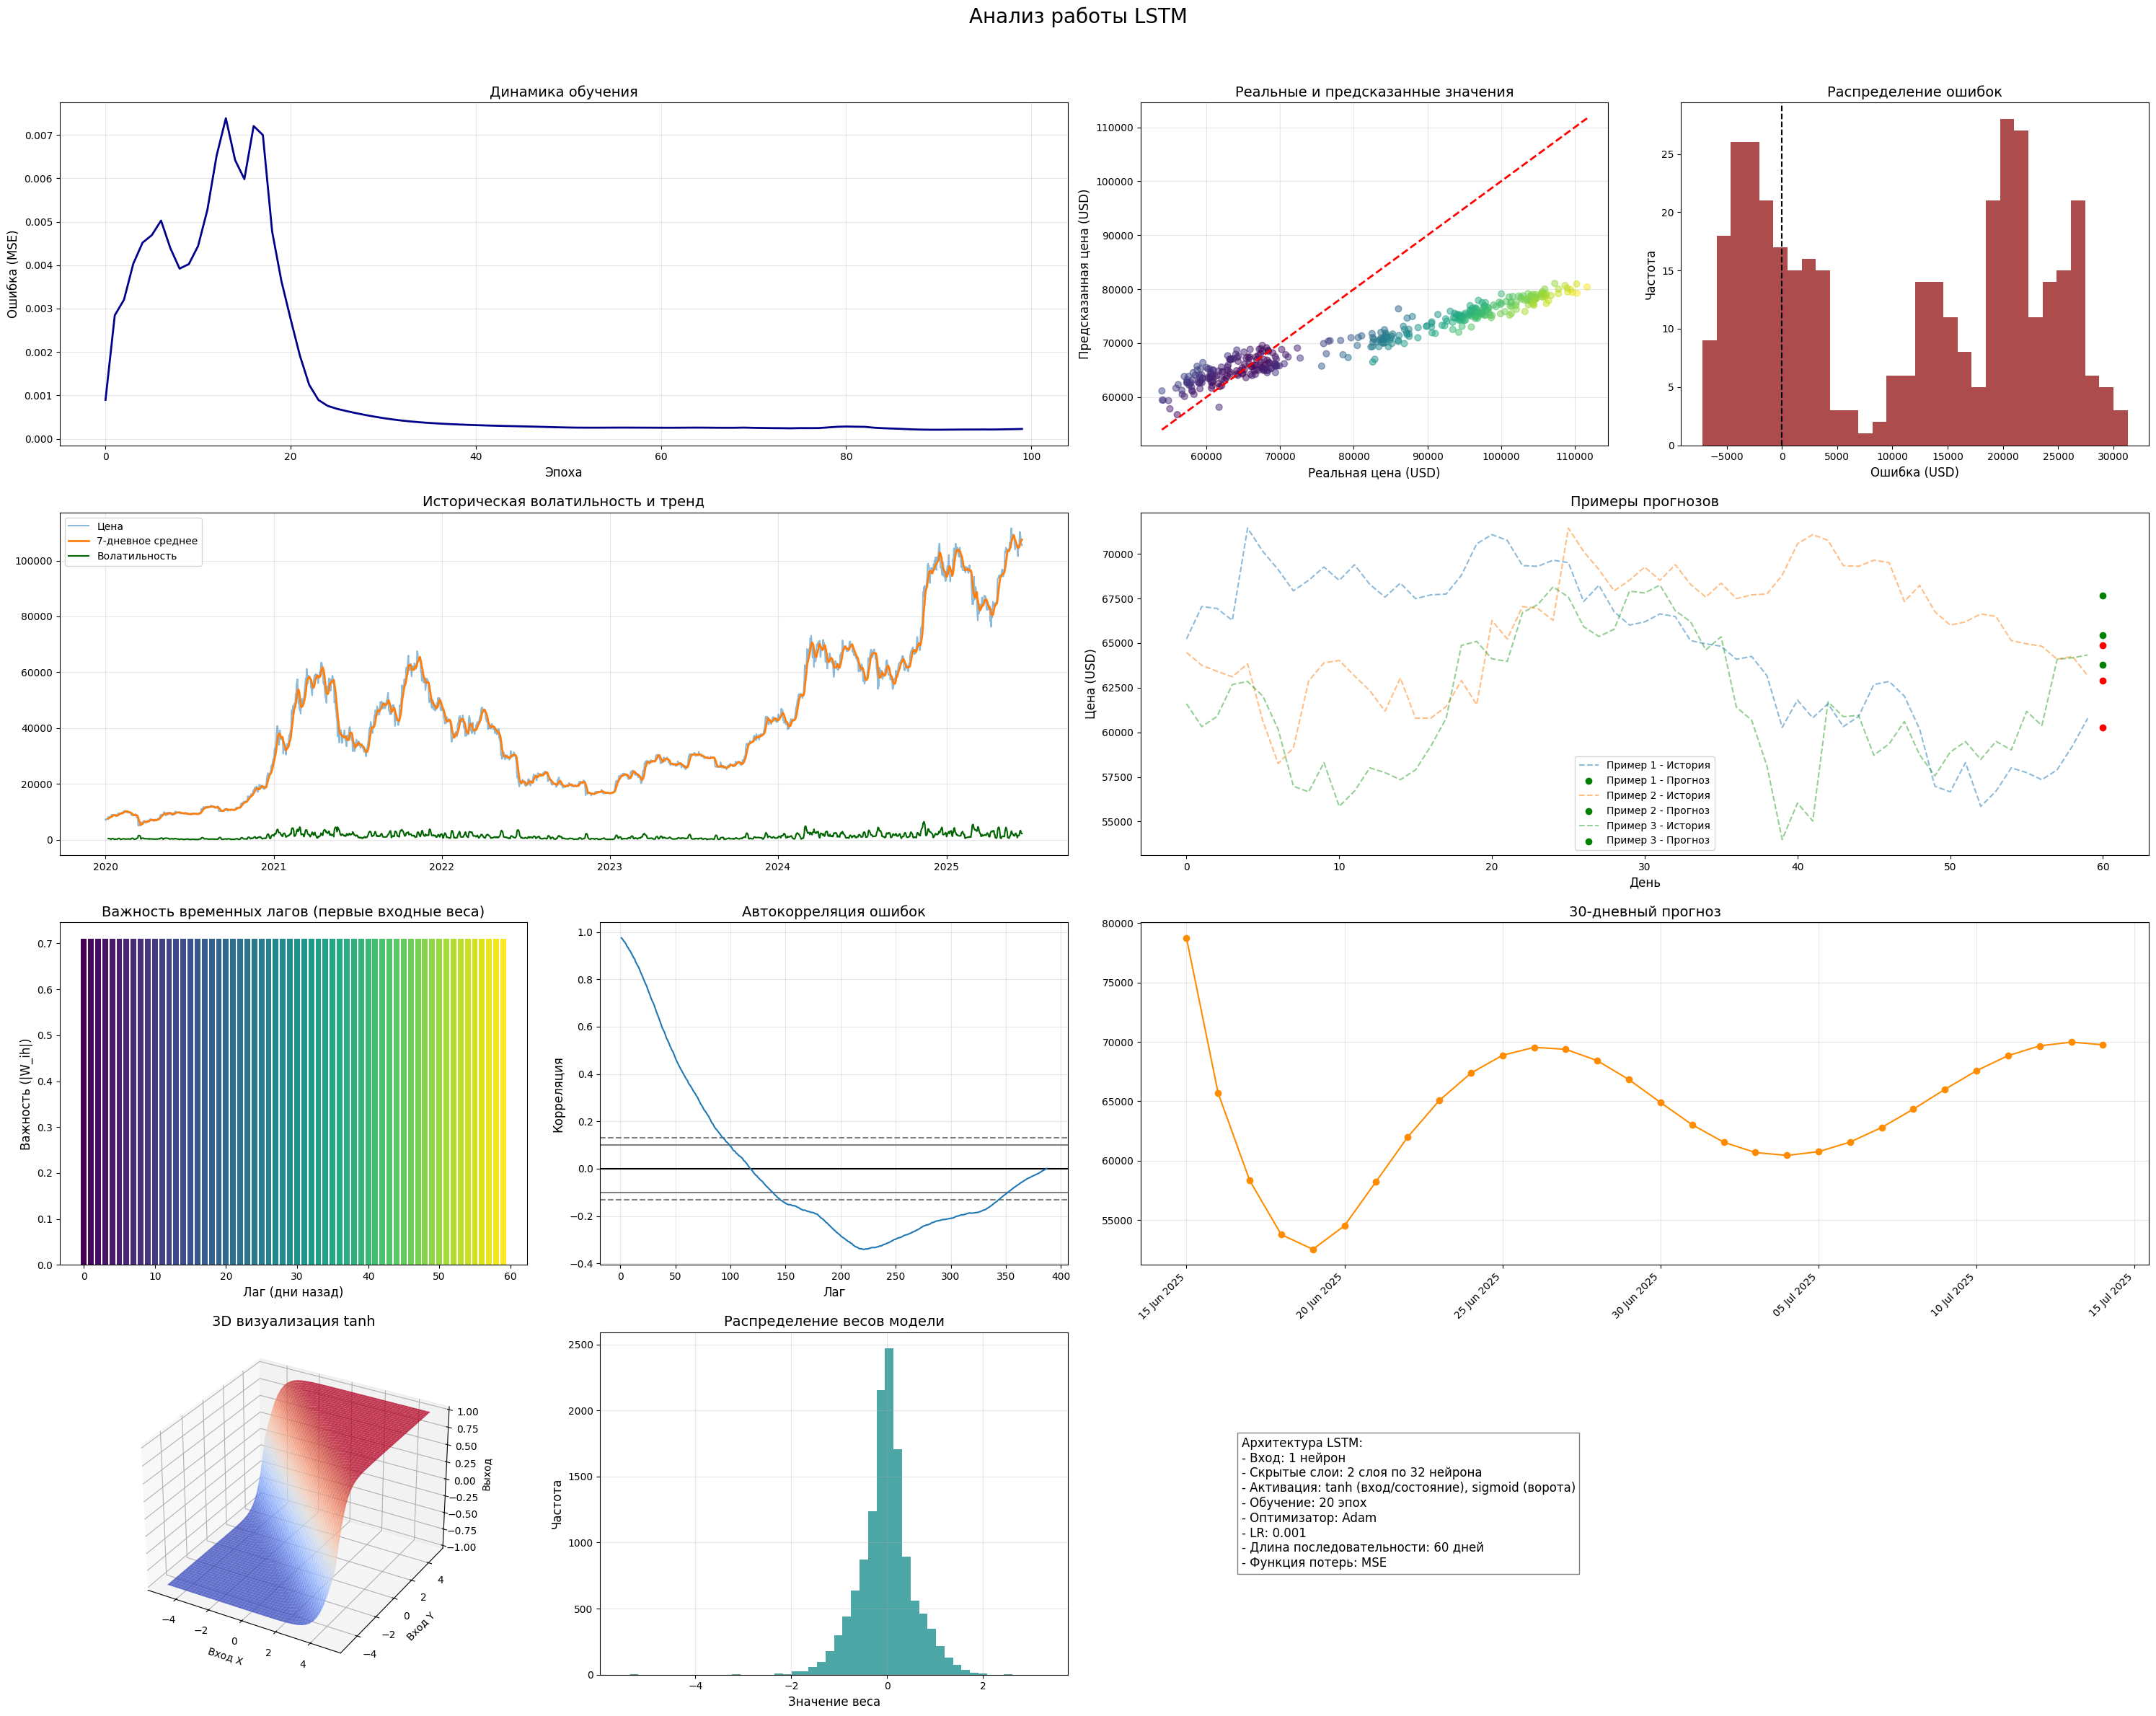

In [ ]:
# Загрузка данных
ticker = "BTC-USD"
data = yf.download(ticker, start = "2020-01-01", end=pd.Timestamp.now().strftime("%Y-%m-%d"))
data = data[["Close"]]

# Нормализация данных
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data)

# Создание последовательностей
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return torch.FloatTensor(X), torch.FloatTensor(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Разделение данных
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Определение LSTM модели
class BitcoinLSTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 32, num_layers = 2):
        super(BitcoinLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers,
            batch_first = True
        )
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

# Инициализация модели
model = BitcoinLSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Обучение модели
num_epochs = 100
train_loss = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i in range(len(X_train)):
        inputs = X_train[i].unsqueeze(0)
        target = y_train[i].unsqueeze(0)

        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(X_train)
    train_loss.append(avg_loss)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {avg_loss:.6f}')

# Прогнозирование
def forecast(model, sequence, days = 30):
    current_seq = sequence.squeeze(0)
    predictions = []
    for _ in range(days):
        pred = model(current_seq.unsqueeze(0))
        predictions.append(pred.item())
        current_seq = torch.cat((current_seq[1:], pred))
    return predictions

# Генерация прогноза
last_sequence = scaled_data[-seq_length:]
input_tensor = torch.FloatTensor(last_sequence).unsqueeze(0)
scaled_forecast = forecast(model, input_tensor, days = 30)
forecast_prices = scaler.inverse_transform(np.array(scaled_forecast).reshape(-1, 1))

# Преобразование предсказаний и тестовых данных
model.eval()
test_predictions = []
with torch.no_grad():
    for seq in X_test:
        pred = model(seq.unsqueeze(0))
        test_predictions.append(pred.item())

test_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

# Создание единой фигуры с subplots
plt.figure(figsize = (30, 25))
plt.suptitle("Анализ работы LSTM", y = 0.95, fontsize = 20)

# 1. График обучения
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan = 2)
ax1.plot(train_loss, color = "darkblue", linewidth = 2)
ax1.set_title("Динамика обучения", fontsize = 14)
ax1.set_xlabel("Эпоха", fontsize = 12)
ax1.set_ylabel("Ошибка (MSE)", fontsize = 12)
ax1.grid(True, alpha = 0.3)

# 2. Сравнение реальных и предсказанных значений
ax2 = plt.subplot2grid((4, 4), (0, 2))
ax2.scatter(y_test_original, test_predictions, alpha = 0.5, c = np.abs(y_test_original - test_predictions), cmap = "viridis", s = 40)
ax2.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], "--r", linewidth = 2)
ax2.set_title("Реальные и предсказанные значения", fontsize = 14)
ax2.set_xlabel("Реальная цена (USD)", fontsize = 12)
ax2.set_ylabel("Предсказанная цена (USD)", fontsize = 12)
ax2.grid(alpha = 0.3)

# 3. Распределение ошибок
ax3 = plt.subplot2grid((4, 4), (0, 3))
errors = y_test_original - test_predictions
ax3.hist(errors, bins = 30, color = "darkred", alpha = 0.7)
ax3.set_title("Распределение ошибок", fontsize = 14)
ax3.set_xlabel("Ошибка (USD)", fontsize = 12)
ax3.set_ylabel("Частота", fontsize = 12)
ax3.axvline(x = 0, color = "black", linestyle = "--")

# 4. Скользящее среднее и волатильность
ax4 = plt.subplot2grid((4, 4), (1, 0), colspan = 2)
window_size = 7
data["MA_7"] = data["Close"].rolling(window = window_size).mean()
data["Volatility"] = data["Close"].rolling(window = window_size).std()
ax4.plot(data["Close"], label = "Цена", alpha = 0.5)
ax4.plot(data["MA_7"], label = "7-дневное среднее", linewidth = 2)
ax4.plot(data["Volatility"], label = "Волатильность", color = "darkgreen")
ax4.set_title("Историческая волатильность и тренд", fontsize = 14)
ax4.legend()
ax4.grid(alpha = 0.3)

# 5. Примеры прогнозов
ax5 = plt.subplot2grid((4, 4), (1, 2), colspan = 2)
for i in range(3):
    idx = np.random.randint(len(X_test))
    seq = X_test[idx].numpy()
    with torch.no_grad():
        pred = model(X_test[idx].unsqueeze(0))
    real = scaler.inverse_transform(y_test[idx].numpy().reshape(-1, 1))

    ax5.plot(scaler.inverse_transform(seq), alpha = 0.5, linestyle = "--", label = f"Пример {i+1} - История")
    ax5.scatter(len(seq), real, color = "red", zorder = 5)
    ax5.scatter(len(seq), scaler.inverse_transform(pred.numpy()), color = "green", zorder = 5, label = f"Пример {i+1} - Прогноз")
ax5.set_title("Примеры прогнозов", fontsize = 14)
ax5.set_xlabel("День", fontsize = 12)
ax5.set_ylabel("Цена (USD)", fontsize = 12)
ax5.legend()

# 6. Важность временных лагов (адаптированная для LSTM)
ax6 = plt.subplot2grid((4, 4), (2, 0))
# Получаем веса входного слоя LSTM
lstm_weights = model.lstm.weight_ih_l0.detach().numpy()
# Средние значения весов по всем нейронам
lag_importance = np.mean(np.abs(lstm_weights[:model.hidden_size]), axis = 0)
ax6.bar(range(seq_length), lag_importance[:seq_length], color = plt.cm.viridis(np.linspace(0, 1, seq_length)))
ax6.set_title("Важность временных лагов (первые входные веса)", fontsize = 14)
ax6.set_xlabel("Лаг (дни назад)", fontsize = 12)
ax6.set_ylabel("Важность (|W_ih|)", fontsize = 12)

# 7. Автокорреляция ошибок
ax7 = plt.subplot2grid((4, 4), (2, 1))
pd.plotting.autocorrelation_plot(errors.flatten(), ax = ax7)
ax7.set_title("Автокорреляция ошибок", fontsize = 14)
ax7.set_xlabel("Лаг", fontsize = 12)
ax7.set_ylabel("Корреляция", fontsize = 12)
ax7.grid(alpha = 0.3)

# 8. Долгосрочный прогноз
ax8 = plt.subplot2grid((4, 4), (2, 2), colspan = 2)
forecast_dates = pd.date_range(start = data.index[-1], periods = 31)[1:]
ax8.plot(forecast_dates, forecast_prices, marker = "o", markersize = 6, linestyle = "-", color = "darkorange")
ax8.set_title("30-дневный прогноз", fontsize = 14)
ax8.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
ax8.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.setp(ax8.get_xticklabels(), rotation = 45, ha = "right")
ax8.grid(True, alpha = 0.3)

# 9. 3D визуализация функции активации
ax9 = plt.subplot2grid((4, 4), (3, 0), projection = "3d")
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.tanh(X + Y)
ax9.plot_surface(X, Y, Z, cmap = "coolwarm", alpha = 0.8)
ax9.set_title("3D визуализация tanh", fontsize = 14)
ax9.set_xlabel("Вход X")
ax9.set_ylabel("Вход Y")
ax9.set_zlabel("Выход")

# 10. Распределение весов модели
ax10 = plt.subplot2grid((4, 4), (3, 1))
all_weights = []
for param in model.parameters():
    if param.requires_grad:
        all_weights.extend(param.detach().numpy().flatten())
ax10.hist(all_weights, bins = 50, color = "teal", alpha = 0.7)
ax10.set_title("Распределение весов модели", fontsize = 14)
ax10.set_xlabel("Значение веса", fontsize = 12)
ax10.set_ylabel("Частота", fontsize = 12)
ax10.grid(True, alpha = 0.3)

# 11. Легенда модели
ax11 = plt.subplot2grid((4, 4), (3, 2), colspan = 2)
ax11.axis("off")
text = """Архитектура LSTM:
- Вход: 1 нейрон
- Скрытые слои: 2 слоя по 32 нейрона
- Активация: tanh (вход/состояние), sigmoid (ворота)
- Обучение: 20 эпох
- Оптимизатор: Adam
- LR: 0.001
- Длина последовательности: 60 дней
- Функция потерь: MSE"""
ax11.text(0.1, 0.5, text, fontsize = 12, va = "center", bbox = dict(facecolor = "white", alpha = 0.5))

plt.tight_layout(rect = [0, 0, 1, 0.93])
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch 0, Loss: 0.000740
Epoch 10, Loss: 0.000226


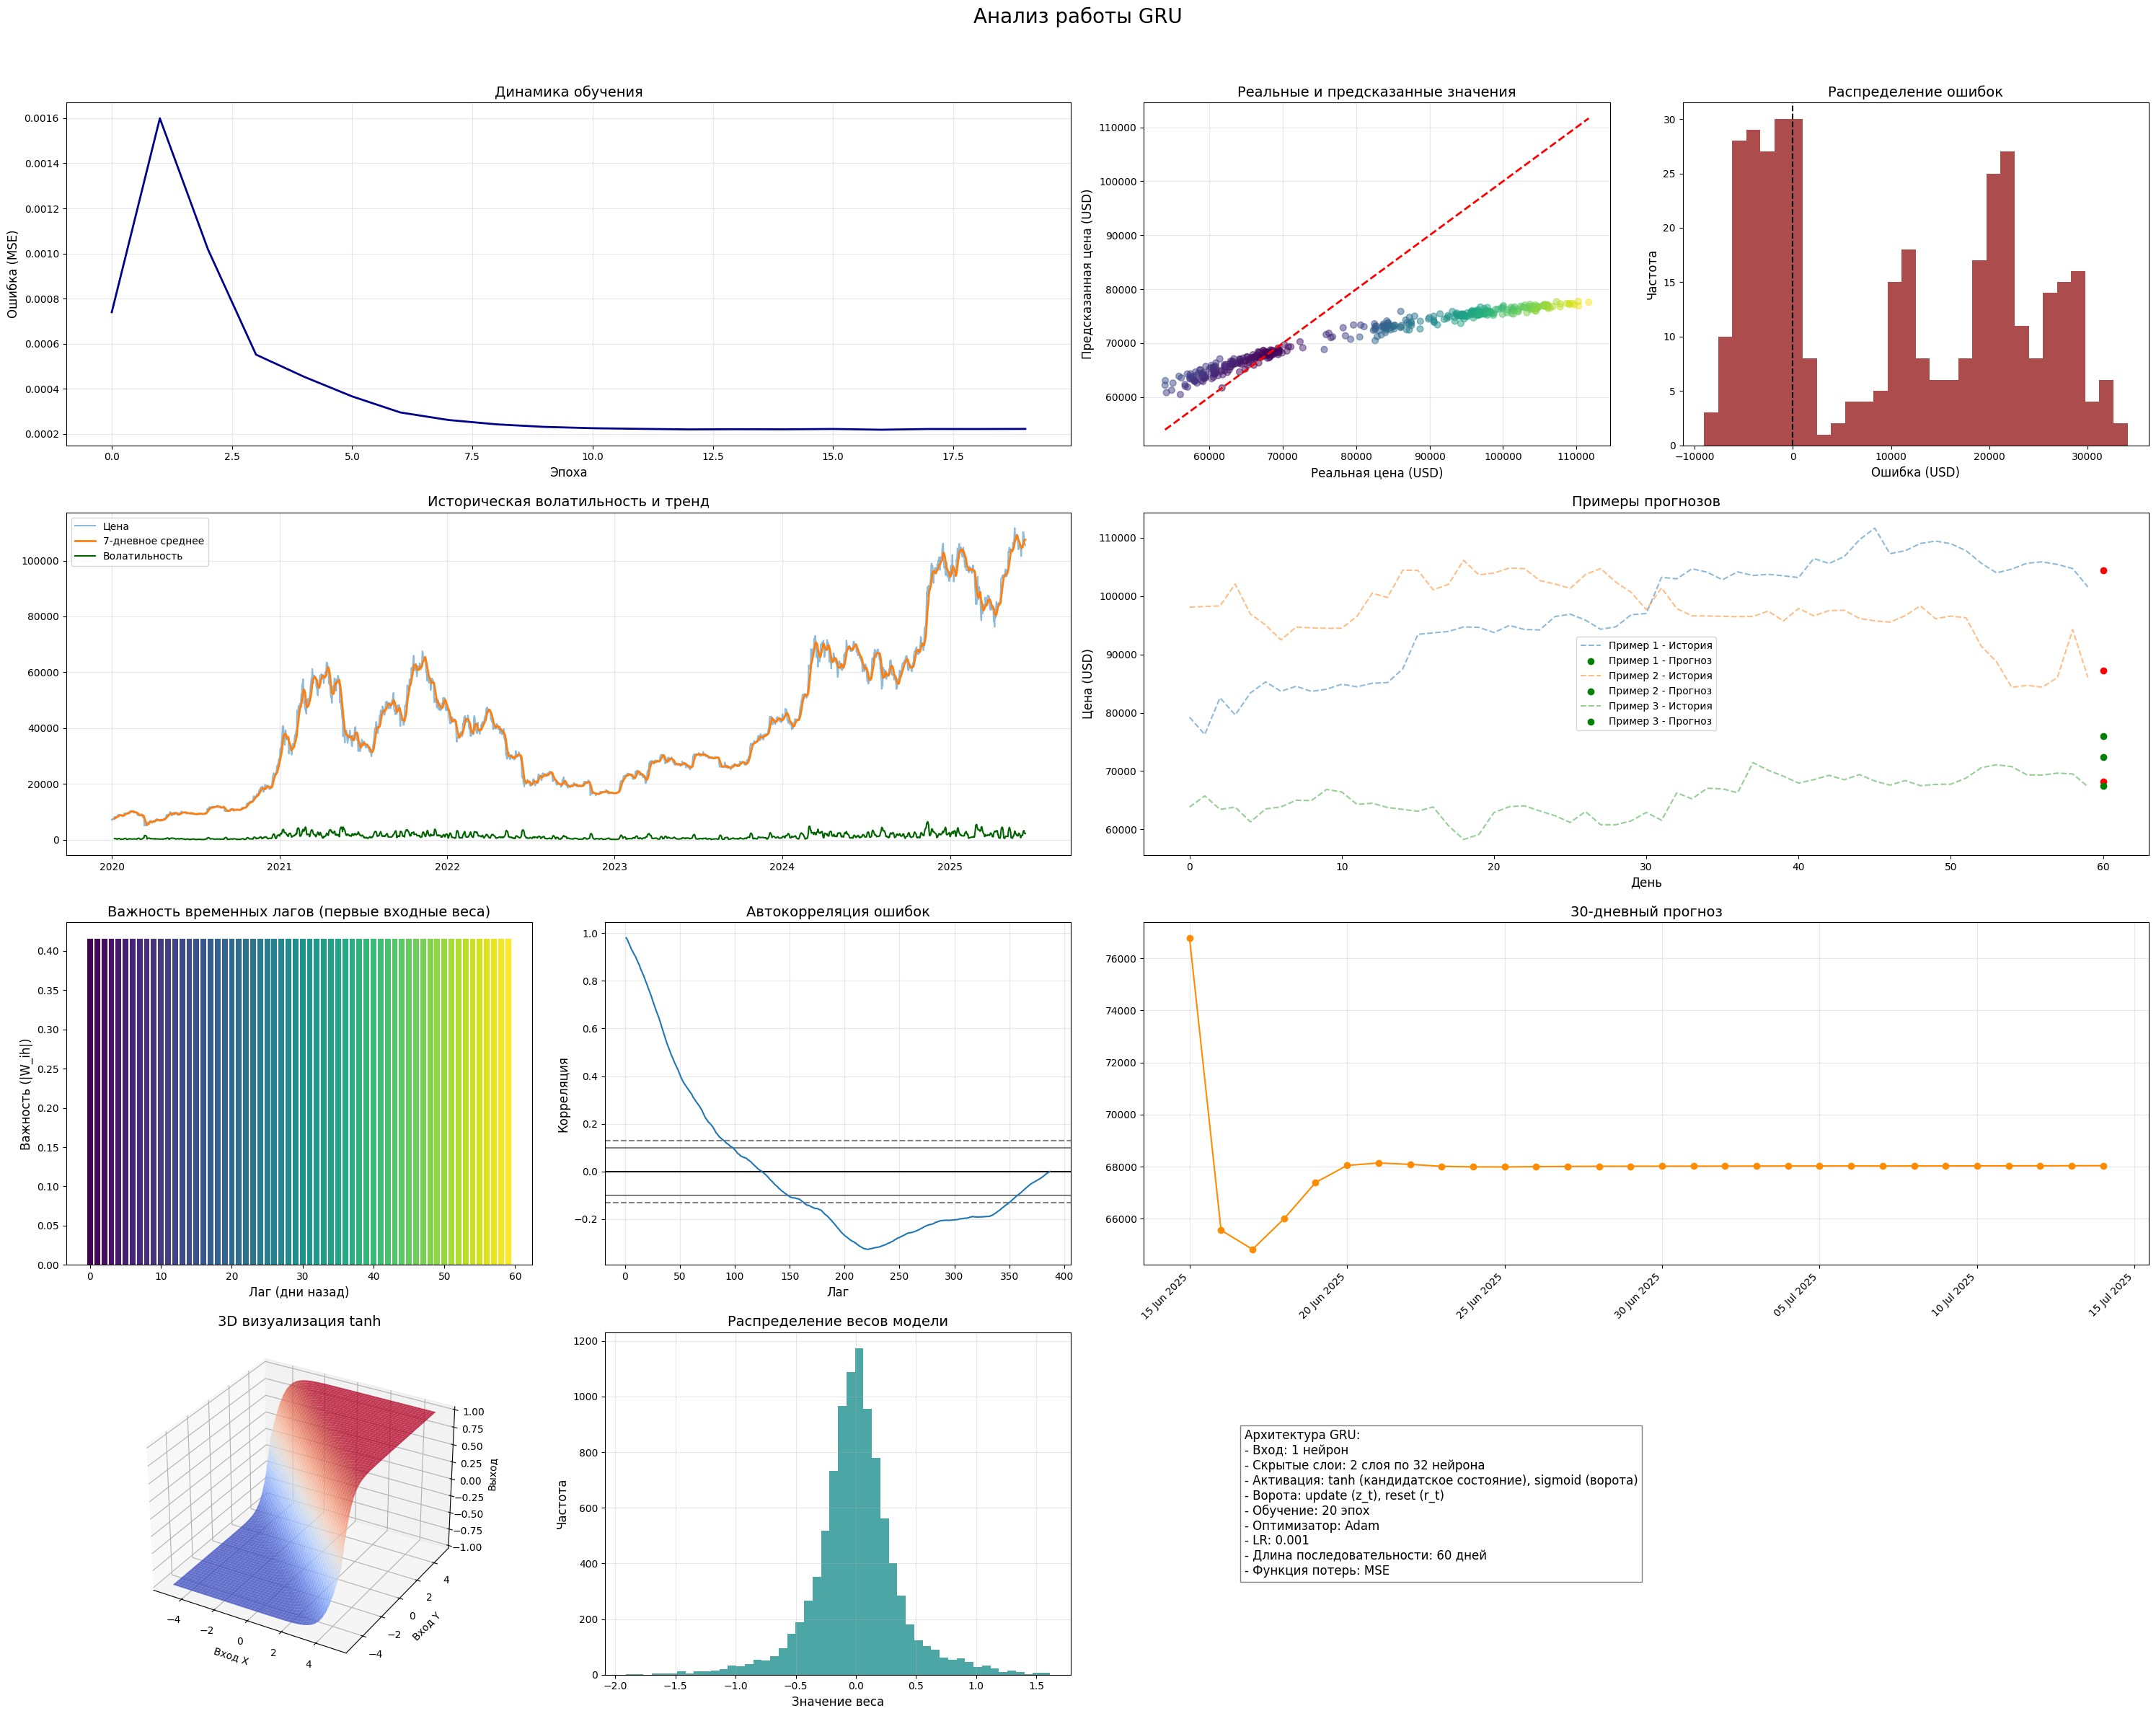

In [ ]:
# Загрузка данных
ticker = "BTC-USD"
data = yf.download(ticker, start = "2020-01-01", end=pd.Timestamp.now().strftime("%Y-%m-%d"))
data = data[["Close"]]

# Нормализация данных
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data)

# Создание последовательностей
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return torch.FloatTensor(X), torch.FloatTensor(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Разделение данных
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Определение GRU модели
class BitcoinGRU(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 32, num_layers = 2):
        super(BitcoinGRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.gru = nn.GRU(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers,
            batch_first = True
        )
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_()
        out, hn = self.gru(x, h0.detach())
        out = self.fc(out[:, -1, :])
        return out

# Инициализация модели
model = BitcoinGRU()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Обучение модели
num_epochs = 20
train_loss = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i in range(len(X_train)):
        inputs = X_train[i].unsqueeze(0)
        target = y_train[i].unsqueeze(0)

        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(X_train)
    train_loss.append(avg_loss)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {avg_loss:.6f}')

# Прогнозирование
def forecast(model, sequence, days = 30):
    current_seq = sequence.squeeze(0)
    predictions = []
    for _ in range(days):
        pred = model(current_seq.unsqueeze(0))
        predictions.append(pred.item())
        current_seq = torch.cat((current_seq[1:], pred))
    return predictions

# Генерация прогноза
last_sequence = scaled_data[-seq_length:]
input_tensor = torch.FloatTensor(last_sequence).unsqueeze(0)
scaled_forecast = forecast(model, input_tensor, days = 30)
forecast_prices = scaler.inverse_transform(np.array(scaled_forecast).reshape(-1, 1))

# Преобразование предсказаний и тестовых данных
model.eval()
test_predictions = []
with torch.no_grad():
    for seq in X_test:
        pred = model(seq.unsqueeze(0))
        test_predictions.append(pred.item())

test_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

# Создание единой фигуры с subplots
plt.figure(figsize = (30, 25))
plt.suptitle("Анализ работы GRU", y = 0.95, fontsize = 20)

# 1. График обучения
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan = 2)
ax1.plot(train_loss, color = "darkblue", linewidth = 2)
ax1.set_title("Динамика обучения", fontsize = 14)
ax1.set_xlabel("Эпоха", fontsize = 12)
ax1.set_ylabel("Ошибка (MSE)", fontsize = 12)
ax1.grid(True, alpha = 0.3)

# 2. Сравнение реальных и предсказанных значений
ax2 = plt.subplot2grid((4, 4), (0, 2))
ax2.scatter(y_test_original, test_predictions, alpha = 0.5, c = np.abs(y_test_original - test_predictions), cmap = "viridis", s = 40)
ax2.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], "--r", linewidth = 2)
ax2.set_title("Реальные и предсказанные значения", fontsize = 14)
ax2.set_xlabel("Реальная цена (USD)", fontsize = 12)
ax2.set_ylabel("Предсказанная цена (USD)", fontsize = 12)
ax2.grid(alpha = 0.3)

# 3. Распределение ошибок
ax3 = plt.subplot2grid((4, 4), (0, 3))
errors = y_test_original - test_predictions
ax3.hist(errors, bins = 30, color = "darkred", alpha = 0.7)
ax3.set_title("Распределение ошибок", fontsize = 14)
ax3.set_xlabel("Ошибка (USD)", fontsize = 12)
ax3.set_ylabel("Частота", fontsize = 12)
ax3.axvline(x = 0, color = "black", linestyle = "--")

# 4. Скользящее среднее и волатильность
ax4 = plt.subplot2grid((4, 4), (1, 0), colspan = 2)
window_size = 7
data["MA_7"] = data["Close"].rolling(window = window_size).mean()
data["Volatility"] = data["Close"].rolling(window = window_size).std()
ax4.plot(data["Close"], label = "Цена", alpha = 0.5)
ax4.plot(data["MA_7"], label = "7-дневное среднее", linewidth = 2)
ax4.plot(data["Volatility"], label = "Волатильность", color = "darkgreen")
ax4.set_title("Историческая волатильность и тренд", fontsize = 14)
ax4.legend()
ax4.grid(alpha = 0.3)

# 5. Примеры прогнозов
ax5 = plt.subplot2grid((4, 4), (1, 2), colspan = 2)
for i in range(3):
    idx = np.random.randint(len(X_test))
    seq = X_test[idx].numpy()
    with torch.no_grad():
        pred = model(X_test[idx].unsqueeze(0))
    real = scaler.inverse_transform(y_test[idx].numpy().reshape(-1, 1))

    ax5.plot(scaler.inverse_transform(seq), alpha = 0.5, linestyle = "--", label = f"Пример {i+1} - История")
    ax5.scatter(len(seq), real, color = "red", zorder = 5)
    ax5.scatter(len(seq), scaler.inverse_transform(pred.numpy()), color = "green", zorder = 5, label = f"Пример {i+1} - Прогноз")
ax5.set_title("Примеры прогнозов", fontsize = 14)
ax5.set_xlabel("День", fontsize = 12)
ax5.set_ylabel("Цена (USD)", fontsize = 12)
ax5.legend()

# 6. Важность временных лагов (адаптированная для GRU)
ax6 = plt.subplot2grid((4, 4), (2, 0))
# Получаем веса входного слоя GRU
gru_weights = model.gru.weight_ih_l0.detach().numpy()
# Средние значения весов по всем нейронам
lag_importance = np.mean(np.abs(gru_weights[:model.hidden_size]), axis = 0)
ax6.bar(range(seq_length), lag_importance[:seq_length], color = plt.cm.viridis(np.linspace(0, 1, seq_length)))
ax6.set_title("Важность временных лагов (первые входные веса)", fontsize = 14)
ax6.set_xlabel("Лаг (дни назад)", fontsize = 12)
ax6.set_ylabel("Важность (|W_ih|)", fontsize = 12)

# 7. Автокорреляция ошибок
ax7 = plt.subplot2grid((4, 4), (2, 1))
pd.plotting.autocorrelation_plot(errors.flatten(), ax = ax7)
ax7.set_title("Автокорреляция ошибок", fontsize = 14)
ax7.set_xlabel("Лаг", fontsize = 12)
ax7.set_ylabel("Корреляция", fontsize = 12)
ax7.grid(alpha = 0.3)

# 8. Долгосрочный прогноз
ax8 = plt.subplot2grid((4, 4), (2, 2), colspan = 2)
forecast_dates = pd.date_range(start = data.index[-1], periods = 31)[1:]
ax8.plot(forecast_dates, forecast_prices, marker = "o", markersize = 6, linestyle = "-", color = "darkorange")
ax8.set_title("30-дневный прогноз", fontsize = 14)
ax8.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
ax8.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.setp(ax8.get_xticklabels(), rotation = 45, ha = "right")
ax8.grid(True, alpha = 0.3)

# 9. 3D визуализация функции активации
ax9 = plt.subplot2grid((4, 4), (3, 0), projection = "3d")
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.tanh(X + Y)
ax9.plot_surface(X, Y, Z, cmap = "coolwarm", alpha = 0.8)
ax9.set_title("3D визуализация tanh", fontsize = 14)
ax9.set_xlabel("Вход X")
ax9.set_ylabel("Вход Y")
ax9.set_zlabel("Выход")

# 10. Распределение весов модели
ax10 = plt.subplot2grid((4, 4), (3, 1))
all_weights = []
for param in model.parameters():
    if param.requires_grad:
        all_weights.extend(param.detach().numpy().flatten())
ax10.hist(all_weights, bins = 50, color = "teal", alpha = 0.7)
ax10.set_title("Распределение весов модели", fontsize = 14)
ax10.set_xlabel("Значение веса", fontsize = 12)
ax10.set_ylabel("Частота", fontsize = 12)
ax10.grid(True, alpha = 0.3)

# 11. Легенда модели
ax11 = plt.subplot2grid((4, 4), (3, 2), colspan = 2)
ax11.axis("off")
text = """Архитектура GRU:
- Вход: 1 нейрон
- Скрытые слои: 2 слоя по 32 нейрона
- Активация: tanh (кандидатское состояние), sigmoid (ворота)
- Ворота: update (z_t), reset (r_t)
- Обучение: 20 эпох
- Оптимизатор: Adam
- LR: 0.001
- Длина последовательности: 60 дней
- Функция потерь: MSE"""
ax11.text(0.1, 0.5, text, fontsize = 12, va = "center", bbox = dict(facecolor = "white", alpha = 0.5))

plt.tight_layout(rect = [0, 0, 1, 0.93])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

1. Почему 30-дневный прогноз быстро теряет смысл
	1.	Накопление ошибок
– При пошаговом (iterative) прогнозе каждая новая точка получается на основе предыдущих предсказаний, а не реальных значений. Погрешность растёт экспоненциально от шага к шагу.
	2.	Нормализация MinMaxScaler
– При экстренных всплесках (резкий рост или падение цены) масштаб сжимается, мелкие флуктуации «зачеркиваются» и модель перестаёт их видеть.
	3.	Ограниченность модели
– Простая LSTM с одной слоёвой архитектурой недостаточно глубокая, чтобы уловить сезонные паттерны, автокорреляцию и разницу между краткосрочными и долгосрочными эффектами.
	4.	Мало входных признаков
– В качестве единственного фичера используется прошлый ряд цен, без объёма торгов, индикаторов (RSI, MACD), ончейн-метрик или сентимента из новостей.
	5.	Неподходящая длина seq_length
– Слишком короткая история (например, <30 дней) не даёт контекста; слишком длинная (>90 дней) добавляет шум и затрудняет обучение.
	6.	Неправильное разделение выборок
– Если вы «тасуете» ряды случайно, случайная часть теста может заглядывать вперёд — но даже при корректном time-split вы теряете сильную корреляцию.

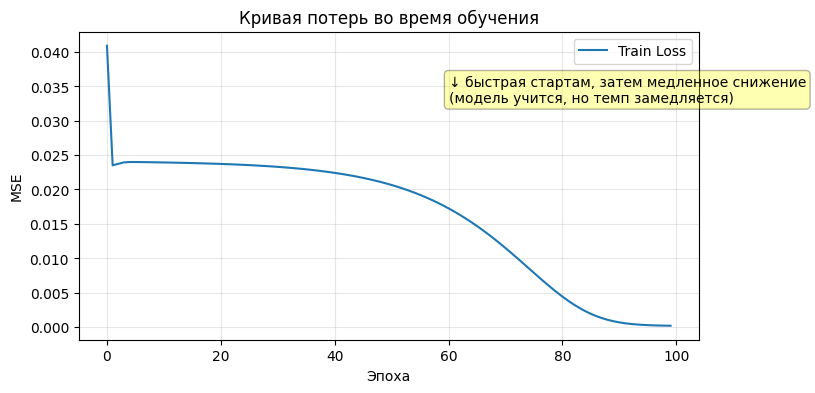

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(loss_history, label='Train Loss')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.title('Кривая потерь во время обучения')

plt.text(
    x=len(loss_history)*0.6,
    y=max(loss_history)*0.8,
    s="↓ быстрая стартам, затем медленное снижение\n(модель учится, но темп замедляется)",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3)
)

plt.legend()
plt.grid(alpha=0.3)
plt.show()

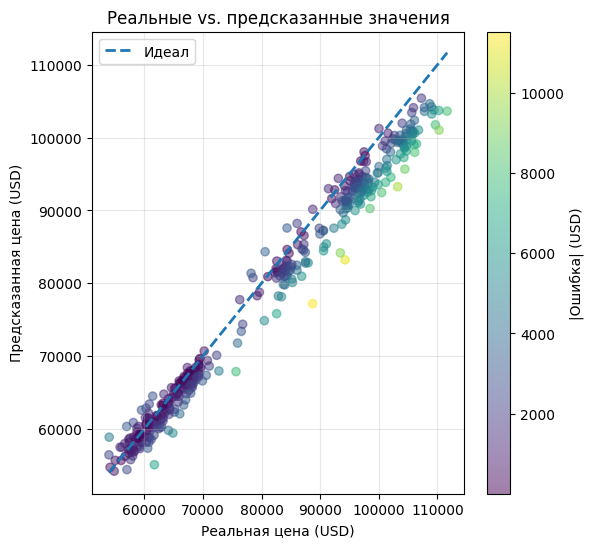

In [ ]:
y_true = y_test_inv.flatten()
y_pred = test_predictions_inv.flatten()

min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())

plt.figure(figsize=(6,6))
sc = plt.scatter(
    y_true, y_pred,
    alpha=0.5,
    c=np.abs(y_true - y_pred),
    cmap='viridis'
)
plt.plot([min_val, max_val], [min_val, max_val], '--', linewidth=2, label='Идеал')
plt.xlabel('Реальная цена (USD)')
plt.ylabel('Предсказанная цена (USD)')
plt.title('Реальные vs. предсказанные значения')
plt.colorbar(sc, label='|Ошибка| (USD)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Точки близкие к диагонали — хорошие предсказания.
Отдаление от неё и цвет показывают, где модель «срывается».

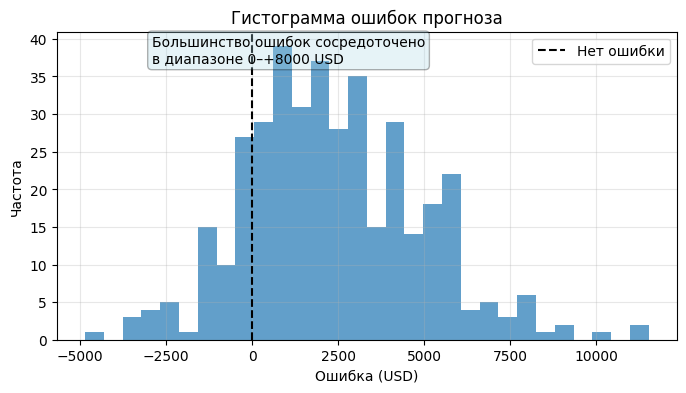

In [ ]:
errors = y_true - y_pred

plt.figure(figsize=(8,4))
plt.hist(errors, bins=30, alpha=0.7)
plt.axvline(0, linestyle='--', color='k', label='Нет ошибки')
plt.xlabel('Ошибка (USD)')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок прогноза')

plt.text(
    x=errors.min()*0.6,
    y=plt.ylim()[1]*0.9,
    s="Большинство ошибок сосредоточено\nв диапазоне 0–+8000 USD",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", alpha=0.3)
)

plt.grid(alpha=0.3)
plt.legend()
plt.show()

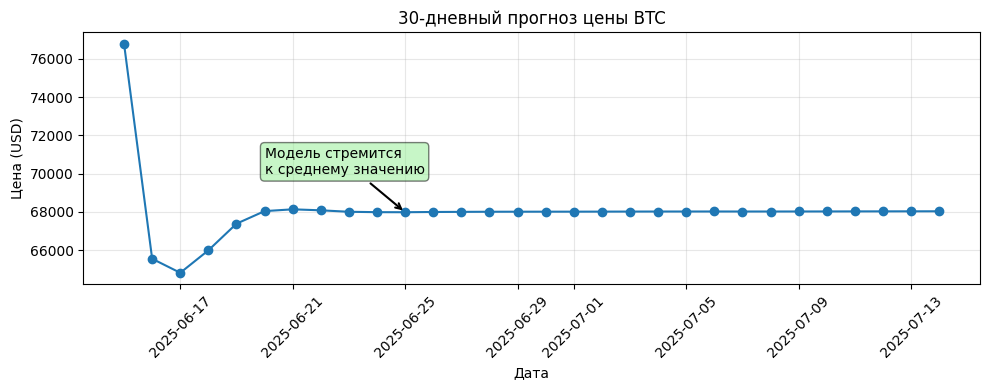

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(forecast_dates, forecast_prices, marker='o', linestyle='-')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.title('30-дневный прогноз цены BTC')
plt.xticks(rotation=45)
plt.tight_layout()

plt.annotate(
    "Модель стремится\nк среднему значению",
    xy=(forecast_dates[10], forecast_prices[10]),
    xytext=(forecast_dates[5], forecast_prices[10]+2000),
    arrowprops=dict(arrowstyle="->", lw=1.5),
    bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen", alpha=0.5)
)

plt.grid(alpha=0.3)
plt.show()

# Проблемы

1. **Утечка данных при нормализации**  
   Вы масштабируете весь набор MinMaxScaler’ом сразу, из-за чего часть информации из тестовой выборки просачивается в тренировочную.

2. **Многошаговый прогноз через рекурсию**  
   Модель обучается на предсказании только следующего дня, а для 30-дневного прогноза вы многократно вставляете в вход предыдущий выход — ошибки накапливаются.

3. **Некорректное разделение выборок**  
   Если применять нормализацию или генерировать обучающие окна без учёта временной последовательности, часть будущих данных может оказаться в обучающем наборе.

4. **Слишком простая архитектура и настройки**  
   Одна LSTM-ячейка или маленькое число нейронов и эпох может не хватить для улавливания сложных временных зависимостей.

5. **Фиксированная длина последовательности**  
   Вы жёстко задали seq_length=60, тогда как оптимальная длина «истории» для предсказания может быть больше или меньше, её надо подбирать.

6. **Недостаток признаков**  
   В модели есть только цены, но не объём торгов, технические индикаторы, новости или ончейн-метрики, которые важны для криптовалют.

7. **Возможные ошибки реализации**  
   – Неправильные индексы при формировании X и y;  
   – Ошибки при обратном масштабировании scaler.inverse_transform;  
   – Не учтено смещение при построении многошагового прогноза.